In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency, kruskal
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [55]:
energy_df = pd.read_csv("energy_dataset.csv")
energy_df.shape

(35064, 29)

In [56]:
pd.set_option('display.max_columns', None)
energy_df.sample(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
13187,2016-07-03 12:00:00+02:00,456.0,301.0,0.0,4727.0,2116.0,337.0,0.0,0.0,0.0,NaN,0.0,1686.0,7794.0,0.0,7112.0,89.0,65.0,2262.0,206.0,0.0,8368.0,2060.0,NaN,8389.0,35567.0,36796.0,26.40,41.55
28275,2018-03-24 03:00:00+01:00,256.0,0.0,0.0,3613.0,1572.0,208.0,0.0,0.0,0.0,NaN,3182.0,1544.0,3379.0,0.0,5411.0,54.0,87.0,16.0,288.0,0.0,14093.0,122.0,NaN,14221.0,24288.0,24509.0,11.00,20.60
16462,2016-11-16 22:00:00+01:00,361.0,885.0,0.0,13140.0,5682.0,297.0,0.0,0.0,0.0,NaN,0.0,647.0,1507.0,0.0,5052.0,58.0,96.0,81.0,298.0,0.0,1705.0,62.0,NaN,1699.0,31523.0,31609.0,60.56,66.06
32825,2018-09-29 18:00:00+02:00,361.0,701.0,0.0,4443.0,4544.0,252.0,0.0,0.0,0.0,NaN,0.0,562.0,868.0,0.0,6983.0,58.0,108.0,3231.0,331.0,0.0,3439.0,2898.0,NaN,2855.0,26874.0,26787.0,70.01,74.63
6613,2015-10-03 14:00:00+02:00,499.0,967.0,0.0,4336.0,6010.0,326.0,0.0,0.0,0.0,NaN,0.0,1621.0,5370.0,0.0,6969.0,84.0,62.0,5225.0,161.0,0.0,565.0,5141.0,NaN,537.0,31197.0,31227.0,49.92,56.31
25275,2017-11-19 03:00:00+01:00,358.0,542.0,0.0,5183.0,6504.0,254.0,0.0,0.0,0.0,NaN,1291.0,379.0,235.0,0.0,5050.0,52.0,84.0,30.0,274.0,0.0,2863.0,10.0,NaN,2827.0,21430.0,21545.0,52.52,56.88
29662,2018-05-20 23:00:00+02:00,280.0,221.0,0.0,6378.0,2936.0,228.0,0.0,0.0,0.0,NaN,0.0,1507.0,4191.0,0.0,5055.0,58.0,95.0,29.0,175.0,0.0,2789.0,89.0,NaN,2619.0,25041.0,24969.0,62.07,66.78
25244,2017-11-17 20:00:00+01:00,362.0,653.0,0.0,16877.0,7056.0,330.0,0.0,0.0,0.0,NaN,0.0,548.0,1828.0,0.0,5042.0,62.0,105.0,154.0,276.0,0.0,3937.0,118.0,NaN,3816.0,34835.0,34657.0,71.25,78.67
16224,2016-11-07 00:00:00+01:00,366.0,314.0,0.0,5094.0,4245.0,251.0,0.0,0.0,0.0,NaN,35.0,770.0,2050.0,0.0,6958.0,58.0,74.0,585.0,279.0,0.0,5076.0,529.0,NaN,5032.0,27670.0,27971.0,42.00,55.38
10425,2016-03-10 09:00:00+01:00,360.0,906.0,0.0,6658.0,4508.0,266.0,0.0,0.0,0.0,NaN,0.0,463.0,3895.0,0.0,7009.0,57.0,79.0,1022.0,281.0,0.0,2568.0,977.0,NaN,2623.0,30484.0,30357.0,53.39,34.19


In [57]:
energy_df.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,NaN,2109.0,952.0,743.0,0.0,7098.0,43.0,74.0,34.0,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,NaN,2108.0,961.0,848.0,0.0,7098.0,43.0,74.0,34.0,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,NaN,2031.0,983.0,1012.0,0.0,7099.0,43.0,72.0,35.0,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,NaN,2119.0,1001.0,1015.0,0.0,7098.0,43.0,73.0,54.0,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,NaN,2170.0,1041.0,1357.0,0.0,7097.0,43.0,74.0,743.0,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


hourly energy demand, energy generation from various sources, and the weather parameters

### Assumptions:

1. The unit of Price columns like 'price day ahead', 'price actual' will be **Euros per Megawatt-hour (€/MWh)** since the dataset is of spanish cities.
2. Generation, load and forecasting columns like 'generation biomass', 'generation fossil brown coal/lignite', 'total load forecast', 'total load actual','forecast solar day ahead', 'forecast wind onshore day should have unit of **Megawatt-hours (MWh) or Gigawatt-hours (GWh)** depending on the column.


In [58]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [59]:
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True)

In [60]:
energy_df.duplicated().sum()

0

In [61]:
energy_df.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

### Since features "generation hydro pumped storage aggregated" and "forecast wind offshore eday ahead" have only null values therefore we are removing both the features.

In [62]:
energy_df['forecast wind offshore eday ahead'].isnull().sum()/energy_df.shape[0]*100

100.0

In [63]:
energy_df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], inplace=True, axis=1)

In [64]:
energy_df['total load actual'].isnull().sum()/energy_df.shape[0]*100

0.10266940451745381

### Since there are 0.10% null values only, rather than filling null values, it is better to remove them. 

In [65]:
energy_df.dropna(inplace=True)

In [66]:
energy_df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [67]:
energy_df.shape

(35017, 27)

In [68]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35017 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35017 non-null  datetime64[ns, UTC]
 1   generation biomass                           35017 non-null  float64            
 2   generation fossil brown coal/lignite         35017 non-null  float64            
 3   generation fossil coal-derived gas           35017 non-null  float64            
 4   generation fossil gas                        35017 non-null  float64            
 5   generation fossil hard coal                  35017 non-null  float64            
 6   generation fossil oil                        35017 non-null  float64            
 7   generation fossil oil shale                  35017 non-null  float64            
 8   generation fossil peat         

In [69]:
def min_max_value(df: pd.DataFrame):
    col_to_kept = []
    # Ensure the column names are stripped of leading/trailing spaces
    df.columns = df.columns.str.strip()
    
    # Get only numeric columns (float64 and int64)
    num_cols = df.select_dtypes(include=['float64', 'int64', 'datetime64[ns, UTC]']).columns
    
    for col in num_cols:
        try:
            # Check min and max values for the column
            min_value = df[col].min()
            max_value = df[col].max()
            
            # If min and max are the same, drop the column
            if min_value == max_value:
                df.drop(columns=col, axis=1, inplace=True)
            else:
                col_to_kept.append(col)
                print(f"Column: {col}, minimum value: {min_value}, maximum value: {max_value}")
                print("*" * 50)
                print()
        except KeyError:
            print(f"Column '{col}' not found in the DataFrame.")
    
    return df.shape, df.columns

# Example usage:
min_max_value(df=energy_df)


Column: time, minimum value: 2014-12-31 23:00:00+00:00, maximum value: 2018-12-31 22:00:00+00:00
**************************************************

Column: generation biomass, minimum value: 0.0, maximum value: 592.0
**************************************************

Column: generation fossil brown coal/lignite, minimum value: 0.0, maximum value: 999.0
**************************************************

Column: generation fossil gas, minimum value: 0.0, maximum value: 20034.0
**************************************************

Column: generation fossil hard coal, minimum value: 0.0, maximum value: 8359.0
**************************************************

Column: generation fossil oil, minimum value: 0.0, maximum value: 449.0
**************************************************

Column: generation hydro pumped storage consumption, minimum value: 0.0, maximum value: 4523.0
**************************************************

Column: generation hydro run-of-river and poundage, minimum val

((35017, 21),
 Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
        'generation fossil gas', 'generation fossil hard coal',
        'generation fossil oil', 'generation hydro pumped storage consumption',
        'generation hydro run-of-river and poundage',
        'generation hydro water reservoir', 'generation nuclear',
        'generation other', 'generation other renewable', 'generation solar',
        'generation waste', 'generation wind onshore',
        'forecast solar day ahead', 'forecast wind onshore day ahead',
        'total load forecast', 'total load actual', 'price day ahead',
        'price actual'],
       dtype='object'))

In [70]:
weather_df = pd.read_csv('weather_features.csv')
weather_df.shape

(178396, 17)

In [71]:
weather_df.head(10)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 05:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 06:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 07:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
8,2015-01-01 08:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d
9,2015-01-01 09:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [72]:
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], utc=True)


In [73]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   dt_iso               178396 non-null  datetime64[ns, UTC]
 1   city_name            178396 non-null  object             
 2   temp                 178396 non-null  float64            
 3   temp_min             178396 non-null  float64            
 4   temp_max             178396 non-null  float64            
 5   pressure             178396 non-null  int64              
 6   humidity             178396 non-null  int64              
 7   wind_speed           178396 non-null  int64              
 8   wind_deg             178396 non-null  int64              
 9   rain_1h              178396 non-null  float64            
 10  rain_3h              178396 non-null  float64            
 11  snow_3h              178396 non-null  float64            
 12  cl

In [74]:
weather_df.drop_duplicates(inplace=True)

In [75]:
weather_df.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [76]:
weather_df.groupby('city_name').size()

city_name
 Barcelona    35472
Bilbao        35947
Madrid        36263
Seville       35553
Valencia      35140
dtype: int64

In [77]:
def unique_value(df):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"column name: {col}, no of unique values : {df[col].nunique()}")
        print(df[col].unique())
        print("*"*50)
        print()

unique_value(df=weather_df)

column name: city_name, no of unique values : 5
['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']
**************************************************

column name: weather_main, no of unique values : 12
['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze' 'snow' 'dust' 'squall']
**************************************************

column name: weather_description, no of unique values : 43
['sky is clear' 'few clouds' 'scattered clouds' 'broken clouds'
 'overcast clouds' 'light rain' 'moderate rain' 'heavy intensity rain'
 'mist' 'heavy intensity shower rain' 'shower rain' 'very heavy rain'
 'thunderstorm with heavy rain' 'thunderstorm with light rain'
 'thunderstorm with rain' 'proximity thunderstorm' 'thunderstorm'
 'light intensity shower rain' 'light intensity drizzle' 'fog' 'drizzle'
 'smoke' 'heavy intensity drizzle' 'haze' 'proximity shower rain'
 'light intensity drizzle rain' 'light snow' 'rain and snow'
 'light rain and snow' 'snow' 'light thunderst

In [78]:
min_max_value(df=weather_df)

Column: dt_iso, minimum value: 2014-12-31 23:00:00+00:00, maximum value: 2018-12-31 22:00:00+00:00
**************************************************

Column: temp, minimum value: 262.24, maximum value: 315.6
**************************************************

Column: temp_min, minimum value: 262.24, maximum value: 315.15
**************************************************

Column: temp_max, minimum value: 262.24, maximum value: 321.15
**************************************************

Column: pressure, minimum value: 0, maximum value: 1008371
**************************************************

Column: humidity, minimum value: 0, maximum value: 100
**************************************************

Column: wind_speed, minimum value: 0, maximum value: 133
**************************************************

Column: wind_deg, minimum value: 0, maximum value: 360
**************************************************

Column: rain_1h, minimum value: 0.0, maximum value: 12.0
******************

((178375, 17),
 Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
        'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
        'clouds_all', 'weather_id', 'weather_main', 'weather_description',
        'weather_icon'],
       dtype='object'))

### Since "dt_iso" column from weather_df and "time" columns from energy_df are same, we can merge these both datasets.

In [79]:
df = pd.merge(energy_df, weather_df, left_on='time', right_on='dt_iso')


In [80]:
df.shape

(178140, 38)

In [81]:
pd.set_option('display.max_columns', None)
df.sample(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
127742,2017-11-18 13:00:00+00:00,360.0,608.0,7890.0,6974.0,260.0,603.0,482.0,405.0,5046.0,51.0,97.0,3866.0,277.0,3213.0,3905.0,3336.0,28837.0,28912.0,57.82,63.23,2017-11-18 13:00:00+00:00,Barcelona,290.150,290.150,290.150,1020,55,3,207,0.0,0.0,0.0,20,801,clouds,few clouds,02d
135200,2018-01-17 09:00:00+00:00,348.0,574.0,5739.0,5939.0,339.0,0.0,1270.0,2841.0,7102.0,61.0,99.0,1609.0,329.0,8678.0,1559.0,8851.0,37341.0,37048.0,61.59,69.32,2018-01-17 09:00:00+00:00,Valencia,284.150,284.150,284.150,1021,66,3,250,0.0,0.0,0.0,20,801,clouds,few clouds,02d
62813,2016-06-04 12:00:00+00:00,238.0,0.0,4458.0,928.0,375.0,435.0,1807.0,5844.0,7095.0,54.0,84.0,5155.0,234.0,4477.0,5001.0,4534.0,31958.0,31439.0,29.97,46.93,2016-06-04 12:00:00+00:00,Seville,300.560,296.150,308.150,1016,40,2,340,0.0,0.0,0.0,0,800,clear,sky is clear,01d
126749,2017-11-10 07:00:00+00:00,373.0,890.0,11255.0,6203.0,328.0,0.0,447.0,1346.0,5967.0,51.0,104.0,147.0,332.0,2744.0,168.0,2776.0,30376.0,30457.0,69.10,68.87,2017-11-10 07:00:00+00:00,Valencia,281.150,281.150,281.150,1025,78,3,270,0.0,0.0,0.0,20,801,clouds,few clouds,02n
17345,2015-05-26 14:00:00+00:00,544.0,0.0,4042.0,3446.0,381.0,0.0,755.0,2498.0,5032.0,88.0,67.0,4972.0,208.0,8774.0,5047.0,8685.0,29735.0,30156.0,49.05,60.18,2015-05-26 14:00:00+00:00,Barcelona,292.241,292.241,292.241,1015,64,4,180,0.0,0.0,0.0,24,801,clouds,few clouds,02
73063,2016-08-28 21:00:00+00:00,391.0,558.0,4289.0,4370.0,242.0,66.0,699.0,1974.0,6948.0,57.0,63.0,376.0,264.0,6288.0,393.0,6267.0,28059.0,28283.0,42.69,50.25,2016-08-28 21:00:00+00:00,Seville,302.980,301.150,306.150,1017,51,4,220,0.0,0.0,0.0,0,800,clear,sky is clear,01n
86281,2016-12-14 19:00:00+00:00,335.0,990.0,14880.0,7217.0,320.0,0.0,701.0,5525.0,5054.0,59.0,108.0,31.0,295.0,1272.0,1.0,1346.0,37140.0,37085.0,71.20,81.93,2016-12-14 19:00:00+00:00,Bilbao,282.190,278.150,287.150,1020,82,2,300,0.0,0.0,0.0,75,803,clouds,broken clouds,04n
171175,2018-11-06 03:00:00+00:00,340.0,439.0,5566.0,1095.0,236.0,284.0,1710.0,2874.0,5055.0,53.0,99.0,92.0,225.0,2508.0,173.0,2935.0,20935.0,20942.0,51.07,46.06,2018-11-06 03:00:00+00:00,Bilbao,279.930,278.150,282.150,1003,93,1,0,0.3,0.0,0.0,76,500,rain,light rain,10n
160664,2018-08-12 13:00:00+00:00,351.0,0.0,5821.0,4277.0,210.0,400.0,1139.0,1333.0,6042.0,57.0,92.0,2454.0,281.0,5339.0,2672.0,3778.0,26007.0,26752.0,64.13,62.92,2018-08-12 13:00:00+00:00,Seville,306.540,306.150,307.150,1015,36,1,190,0.0,0.0,0.0,0,800,clear,sky is clear,01d
113080,2017-07-20 16:00:00+00:00,389.0,978.0,10018.0,5441.0,357.0,0.0,616.0,877.0,5897.0,20.0,103.0,3833.0,316.0,4987.0,3843.0,4793.0,35201.0,34899.0,49.99,59.40,2017-07-20 16:00:00+00:00,Madrid,305.150,305.150,305.150,1012,13,4,230,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [82]:
df.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,2014-12-31 23:00:00+00:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,2014-12-31 23:00:00+00:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,2014-12-31 23:00:00+00:00,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,2014-12-31 23:00:00+00:00,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,2014-12-31 23:00:00+00:00,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,2015-01-01 00:00:00+00:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,2015-01-01 00:00:00+00:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,2015-01-01 00:00:00+00:00,Bilbao,269.763500,269.763500,269.763500,1035,97,0,229,0.0,0.0,0.0,0,800,clear,sky is clear,01
8,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,2015-01-01 00:00:00+00:00,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
9,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,2015-01-01 00:00:00+00:00,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [83]:
df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual        

### Removing dt_iso column from df dataframe 

In [84]:
df.drop(columns='dt_iso', inplace=True, axis=1)

### Performing Correlation test to check how columns are depended

### Columns with low correlation (absolute value of correlation < 0.05):

1. snow_3h (0.006950)
2. pressure (-0.007230)
3. rain_3h (-0.009281)
4. humidity (-0.025026)
5. rain_1h (-0.035481)
6. clouds_all (-0.052996)
7. wind_deg (-0.099561)


In [85]:
df.shape

(178140, 37)

In [86]:
def create_new_columns(df:pd.DataFrame):
    
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['hour'] = df['time'].dt.hour
    df['year'] = df['time'].dt.year
    df["day_name"] = df['time'].dt.day_name()
    df["quarter"] = df['time'].dt.quarter
    df['date_offset'] = (df['time'].dt.month*100 + df['time'].dt.day - 320)%1300
    df['season'] = pd.cut(df['date_offset'], [-1, 300, 602, 900, 1301],
                         labels=['Spring', 'Summer', 'Fall', 'Winter'])

    df.drop(columns='date_offset', inplace=True, axis=1)
    
create_new_columns(df)

In [87]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'month', 'day', 'hour', 'year', 'day_name', 'quarter',
       'season'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178140 entries, 0 to 178139
Data columns (total 44 columns):
 #   Column                                       Non-Null Count   Dtype              
---  ------                                       --------------   -----              
 0   time                                         178140 non-null  datetime64[ns, UTC]
 1   generation biomass                           178140 non-null  float64            
 2   generation fossil brown coal/lignite         178140 non-null  float64            
 3   generation fossil gas                        178140 non-null  float64            
 4   generation fossil hard coal                  178140 non-null  float64            
 5   generation fossil oil                        178140 non-null  float64            
 6   generation hydro pumped storage consumption  178140 non-null  float64            
 7   generation hydro run-of-river and poundage   178140 non-null  float64            
 8   generation hyd

In [89]:
numerical_features = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Calculate Pearson correlation with target variable
correlation_with_target = df[numerical_features].corrwith(df['price actual'])

# Display correlation values sorted by importance
print(correlation_with_target.sort_values(ascending=False))

price actual                                   1.000000
price day ahead                                0.731945
generation fossil hard coal                    0.464861
generation fossil gas                          0.461790
total load forecast                            0.436374
total load actual                              0.436080
generation fossil brown coal/lignite           0.362255
quarter                                        0.292325
generation fossil oil                          0.284268
month                                          0.280711
generation other renewable                     0.257843
hour                                           0.236991
generation waste                               0.169873
year                                           0.144240
generation biomass                             0.140110
forecast solar day ahead                       0.100732
generation other                               0.099257
generation solar                               0

In [90]:
columns_to_drop = [
    'snow_3h',
    'pressure',
    'rain_3h',
    'humidity',
    'rain_1h',
    'clouds_all',
    'wind_deg',
    'weather_id',
    'generation nuclear',
    'clouds_all', 
    'wind_deg',
]

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True, axis=1)

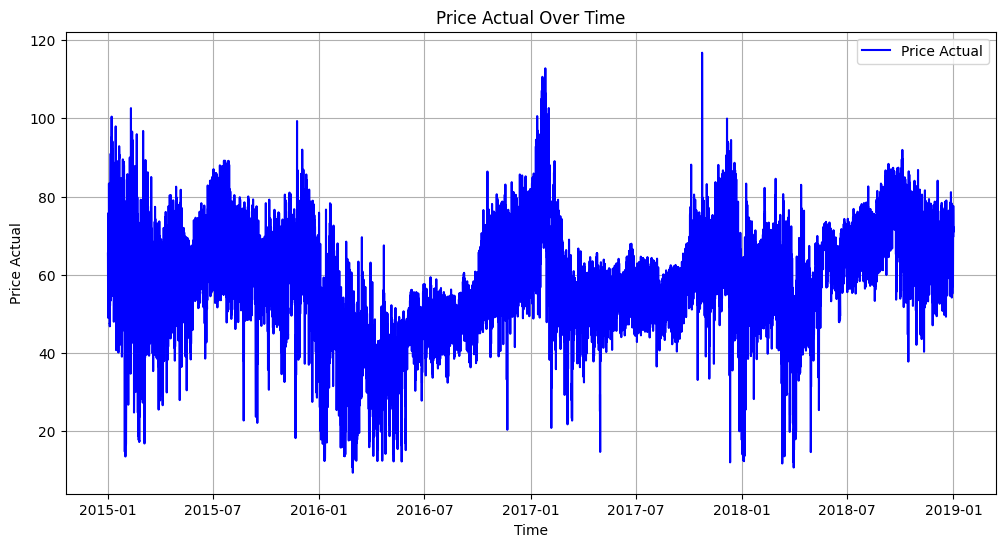

In [91]:
# Set 'time' as the index for better plotting
df.set_index('time', inplace=True)

# Plotting price actual over time
plt.figure(figsize=(12, 6))
plt.plot(df['price actual'], label='Price Actual', color='blue')
plt.title('Price Actual Over Time')
plt.xlabel('Time')
plt.ylabel('Price Actual')
plt.legend()
plt.grid()
plt.show()

## First Week data

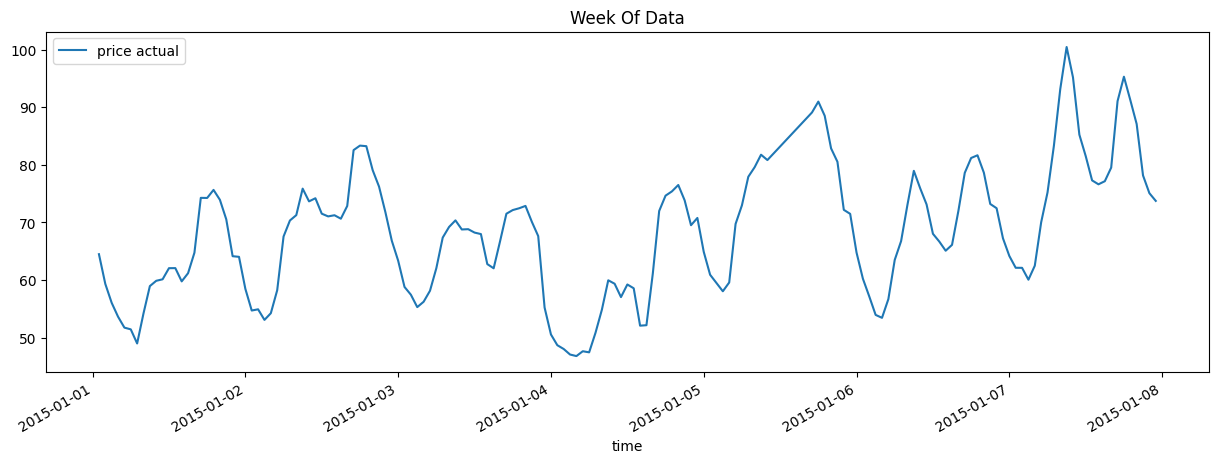

In [92]:
df.loc[(df.index > '01-01-2015') & (df.index < '01-08-2015'), ['price actual']] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

### Second week data

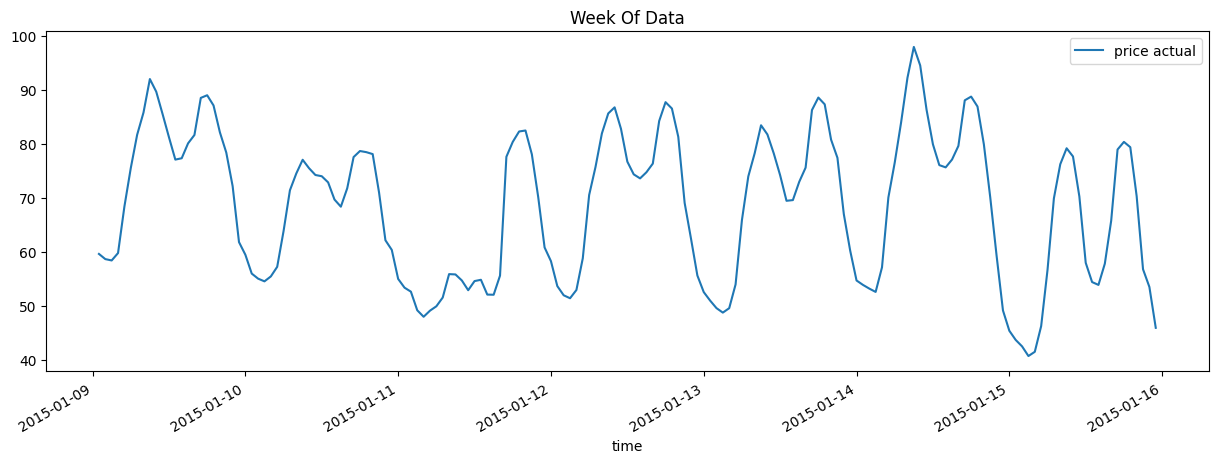

In [93]:
df.loc[(df.index > '01-09-2015') & (df.index < '01-16-2015'), ['price actual']] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

### Last week data

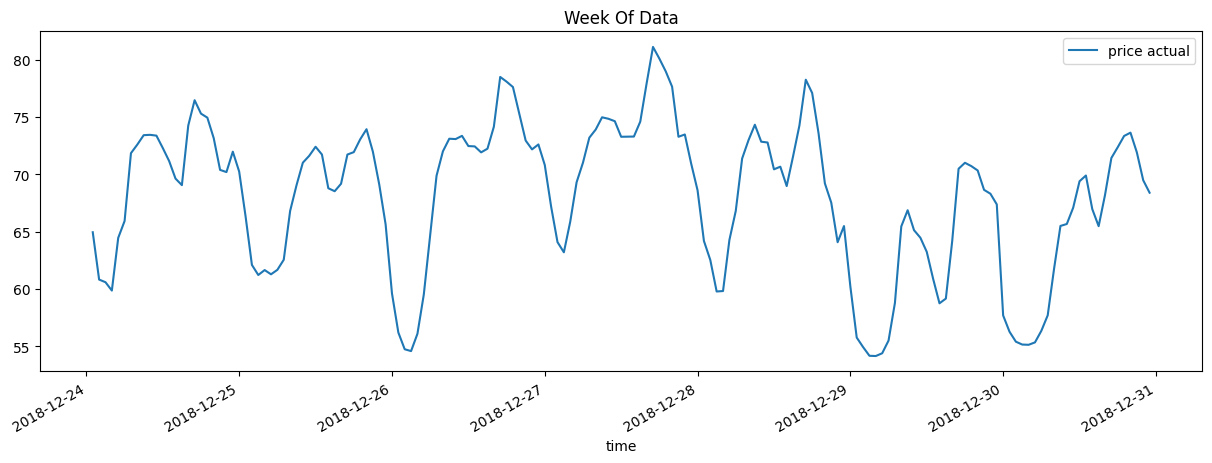

In [94]:
df.loc[(df.index > '12-24-2018') & (df.index < '12-31-2018'), ['price actual']] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

### The pattern for price w.r.t time is almost the same.

In [95]:
df.reset_index(inplace=True)
df.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,wind_speed,weather_main,weather_description,weather_icon,month,day,hour,year,day_name,quarter,season
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,Valencia,270.475000,270.475000,270.475000,1,clear,sky is clear,01n,12,31,23,2014,Wednesday,4,Winter
1,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,Madrid,267.325000,267.325000,267.325000,1,clear,sky is clear,01n,12,31,23,2014,Wednesday,4,Winter
2,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,Bilbao,269.657312,269.657312,269.657312,0,clear,sky is clear,01,12,31,23,2014,Wednesday,4,Winter
3,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,Barcelona,281.625000,281.625000,281.625000,7,clear,sky is clear,01n,12,31,23,2014,Wednesday,4,Winter
4,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,Seville,273.375000,273.375000,273.375000,1,clear,sky is clear,01n,12,31,23,2014,Wednesday,4,Winter
5,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,Valencia,270.475000,270.475000,270.475000,1,clear,sky is clear,01n,1,1,0,2015,Thursday,1,Winter
6,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,Madrid,267.325000,267.325000,267.325000,1,clear,sky is clear,01n,1,1,0,2015,Thursday,1,Winter
7,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,Bilbao,269.763500,269.763500,269.763500,0,clear,sky is clear,01,1,1,0,2015,Thursday,1,Winter
8,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,Barcelona,281.625000,281.625000,281.625000,7,clear,sky is clear,01n,1,1,0,2015,Thursday,1,Winter
9,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,Seville,273.375000,273.375000,273.375000,1,clear,sky is clear,01n,1,1,0,2015,Thursday,1,Winter


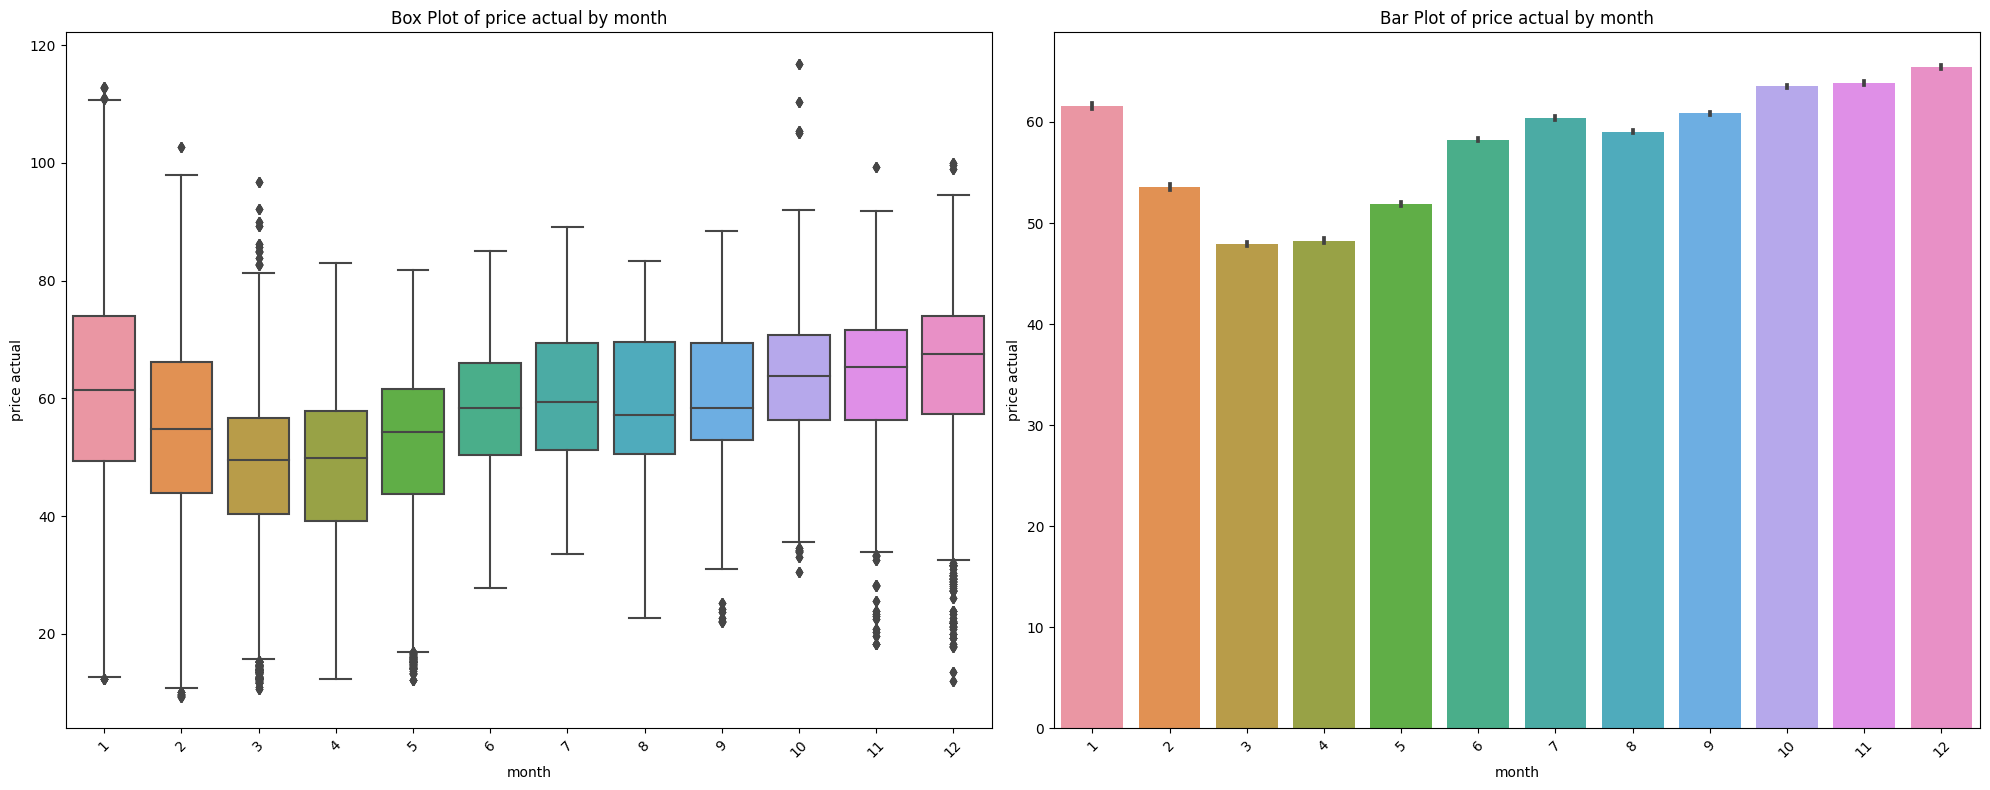

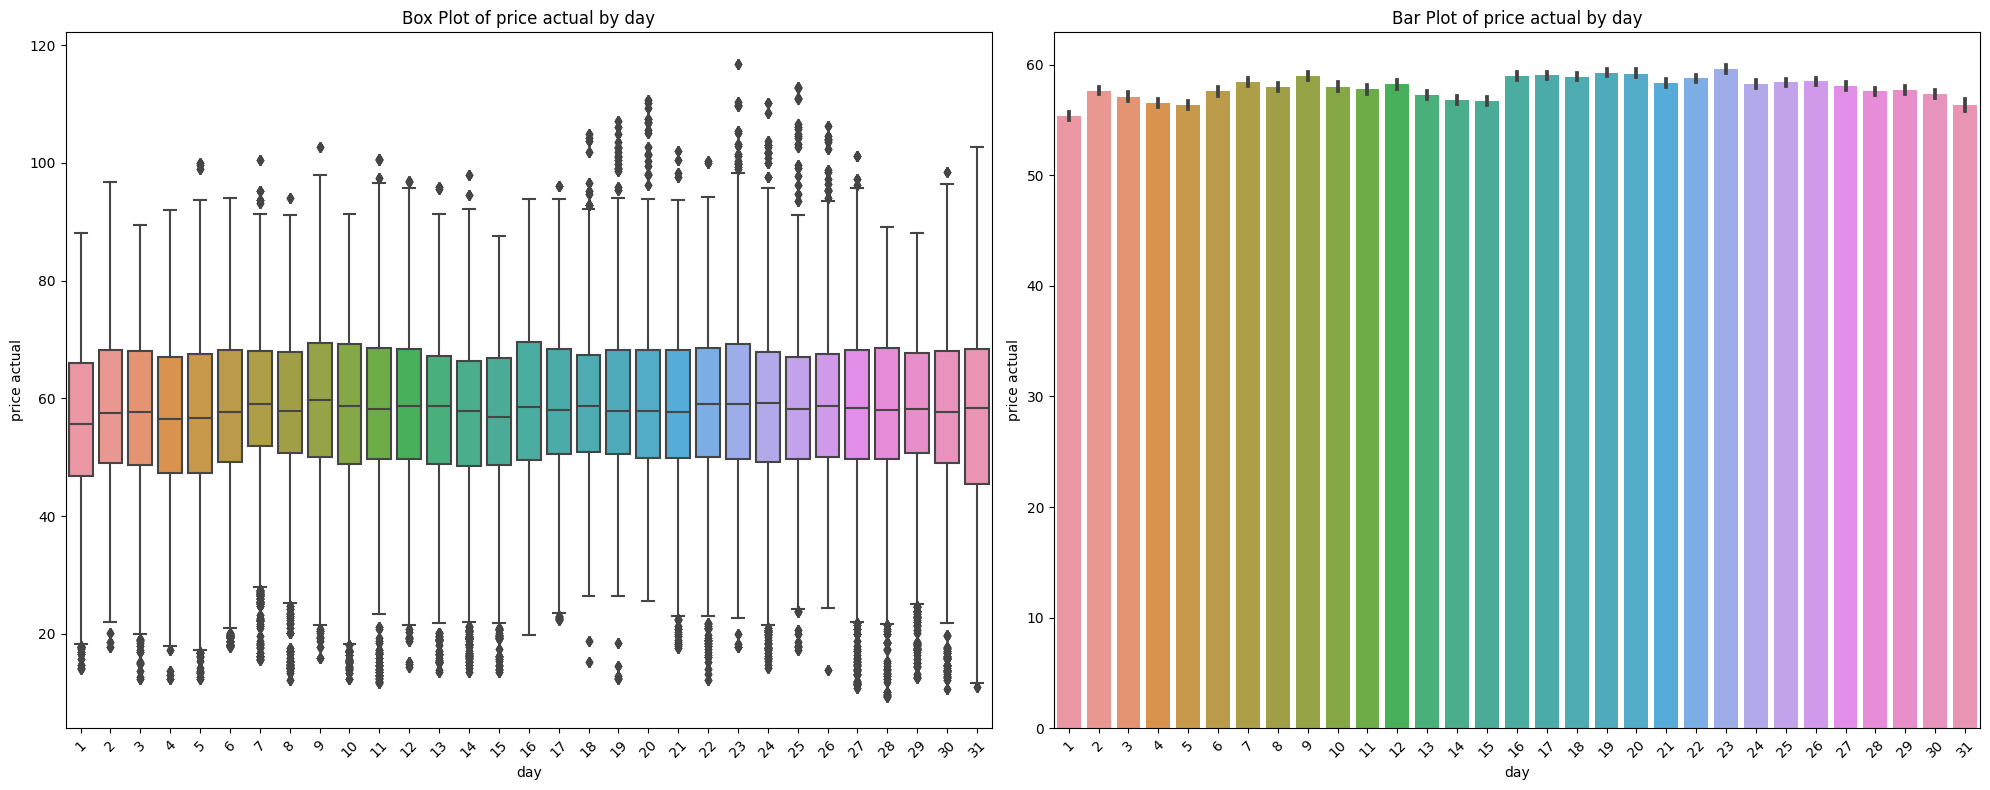

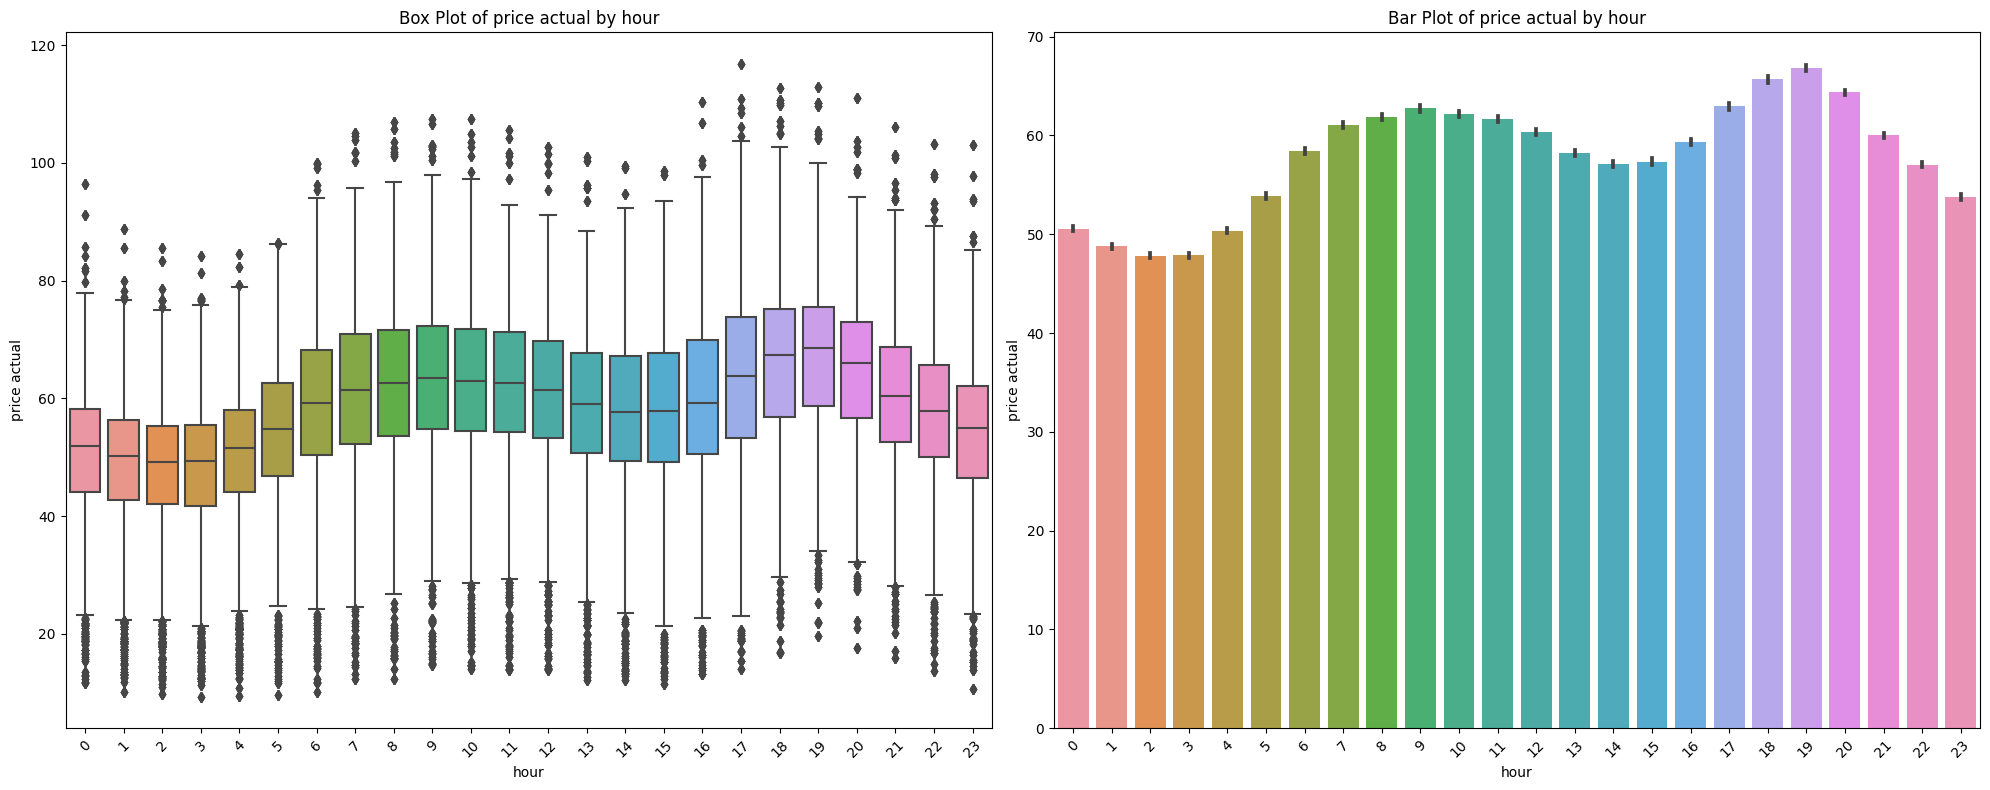

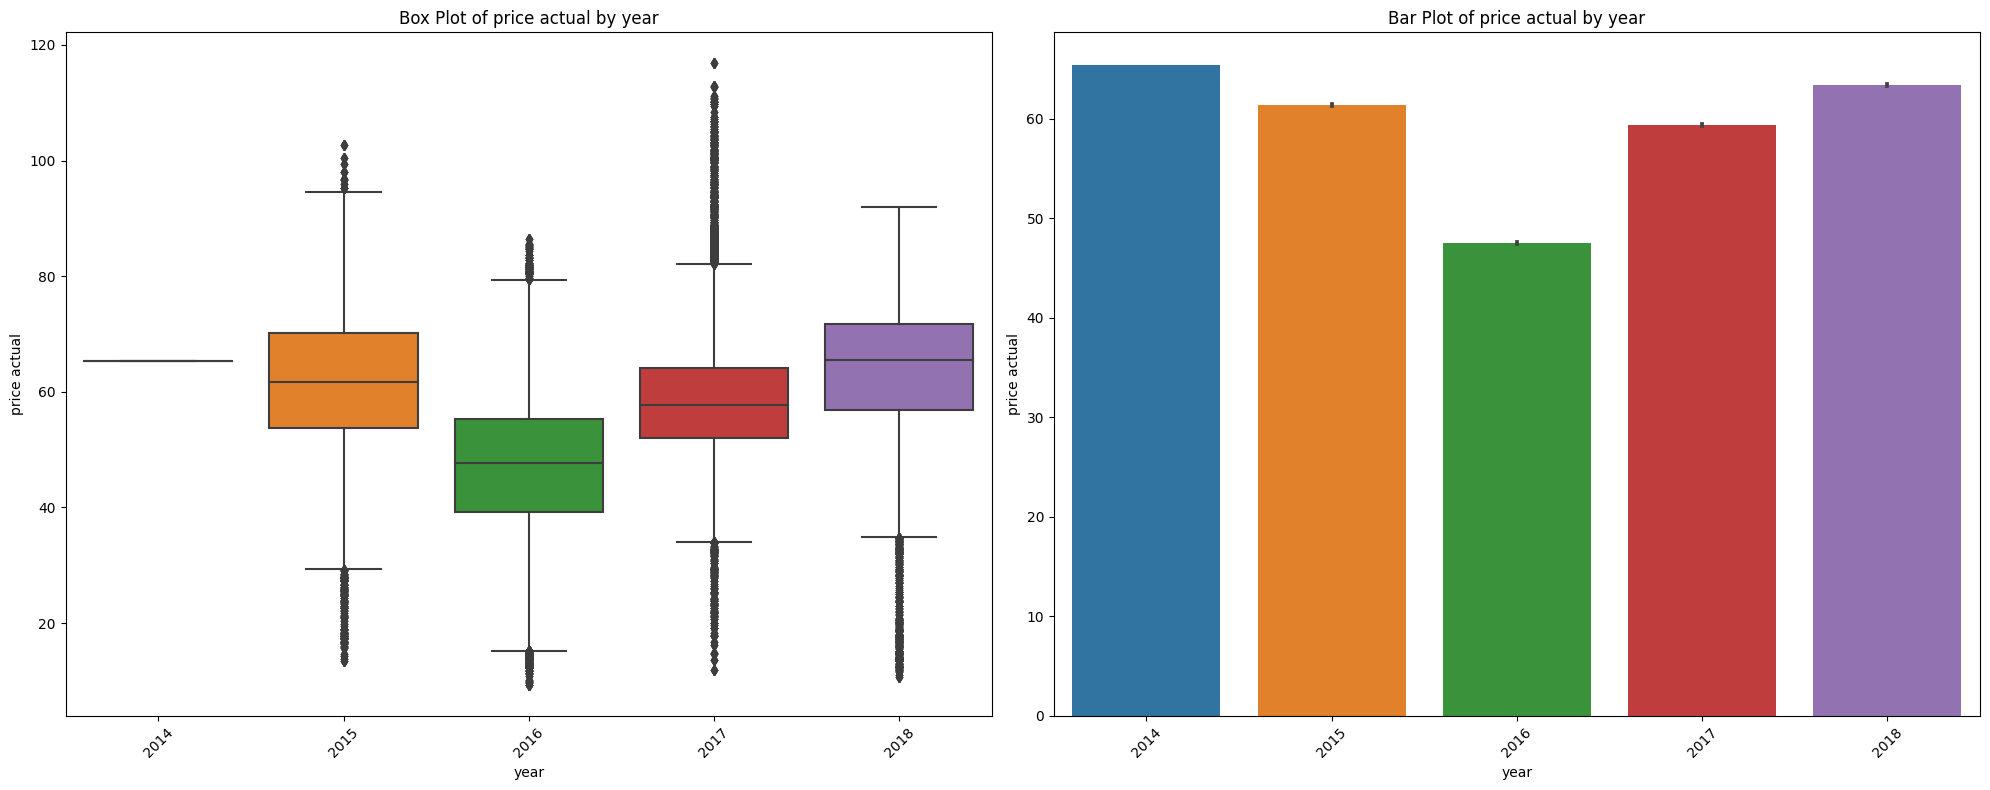

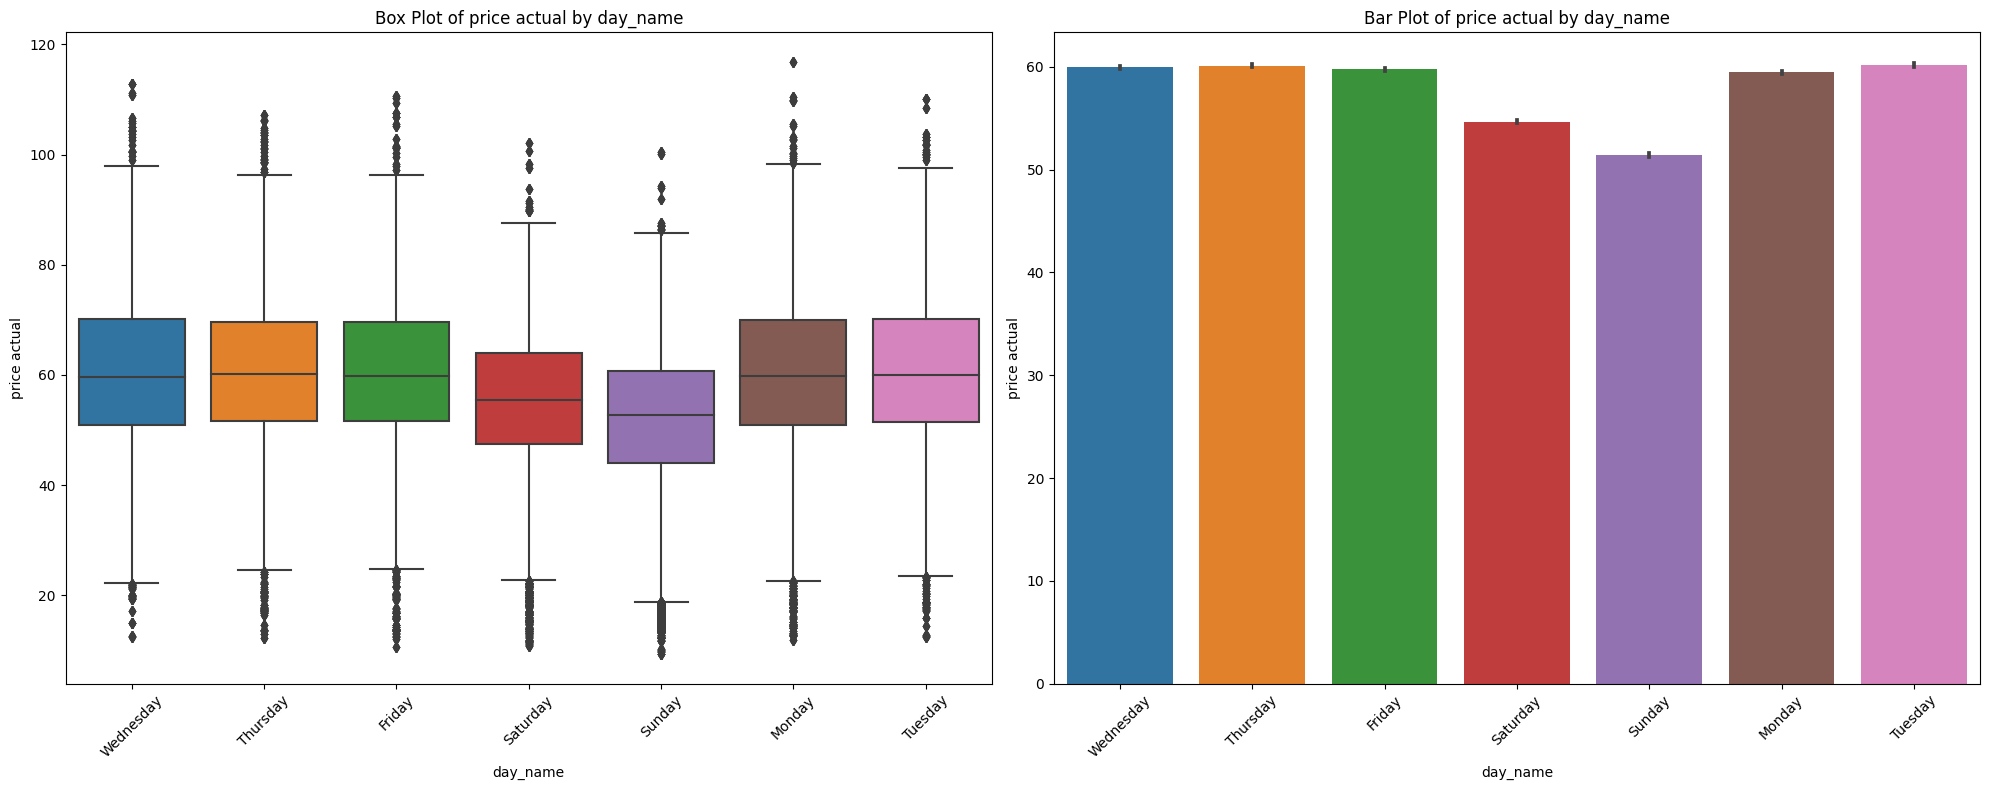

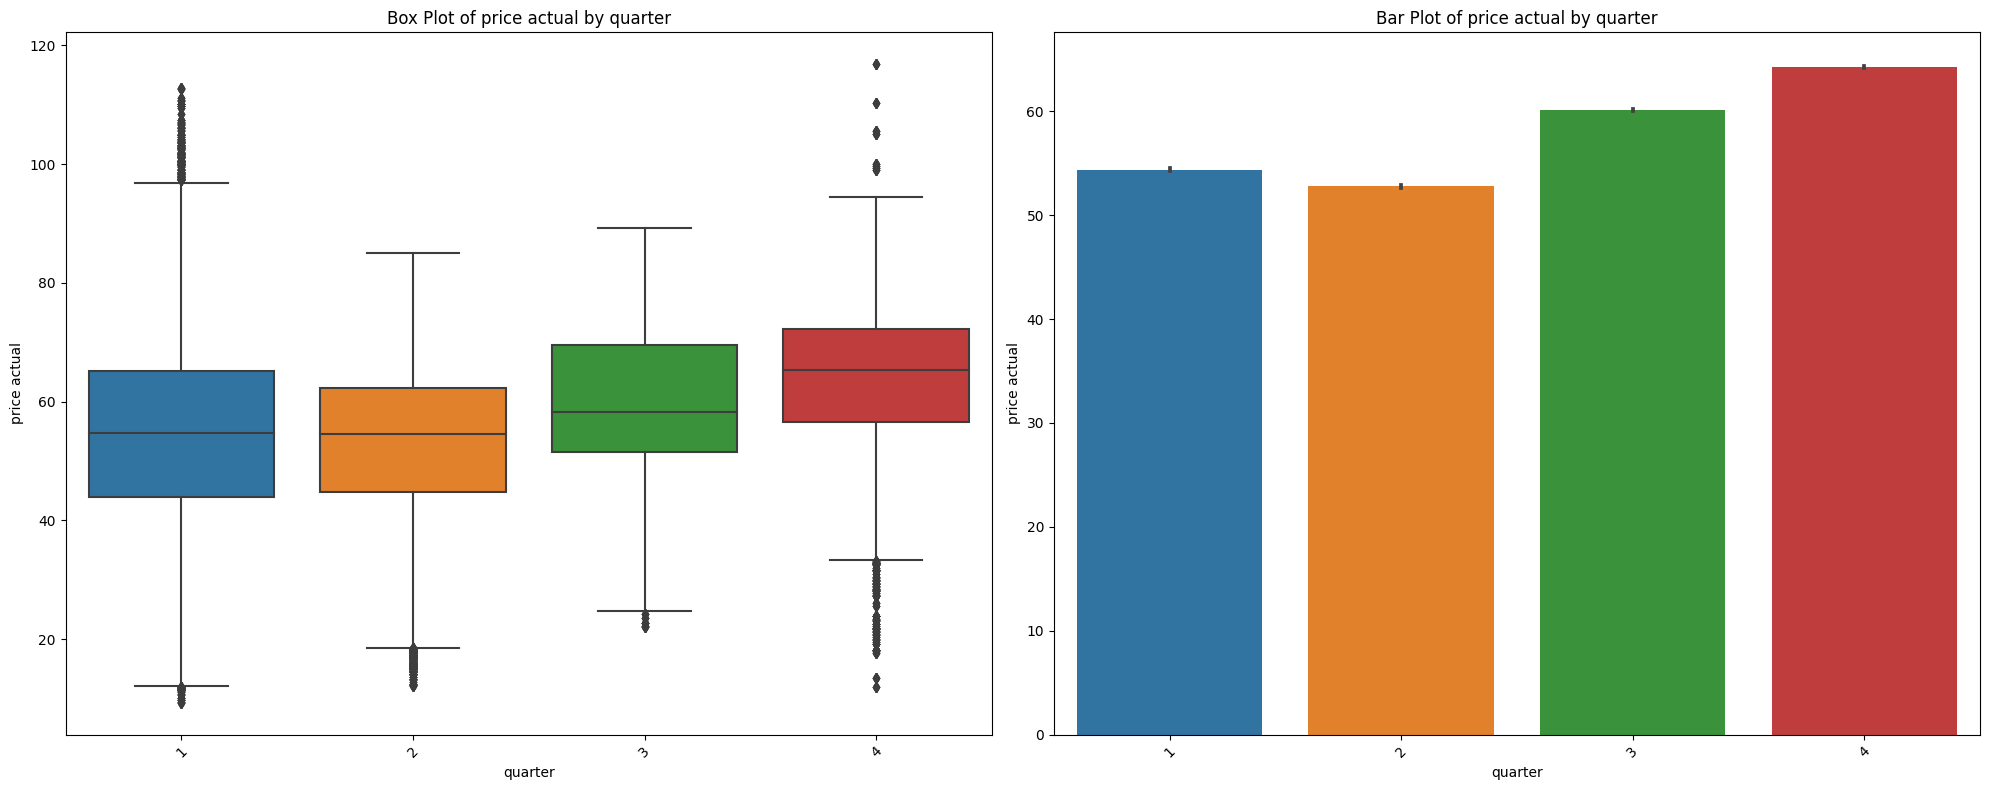

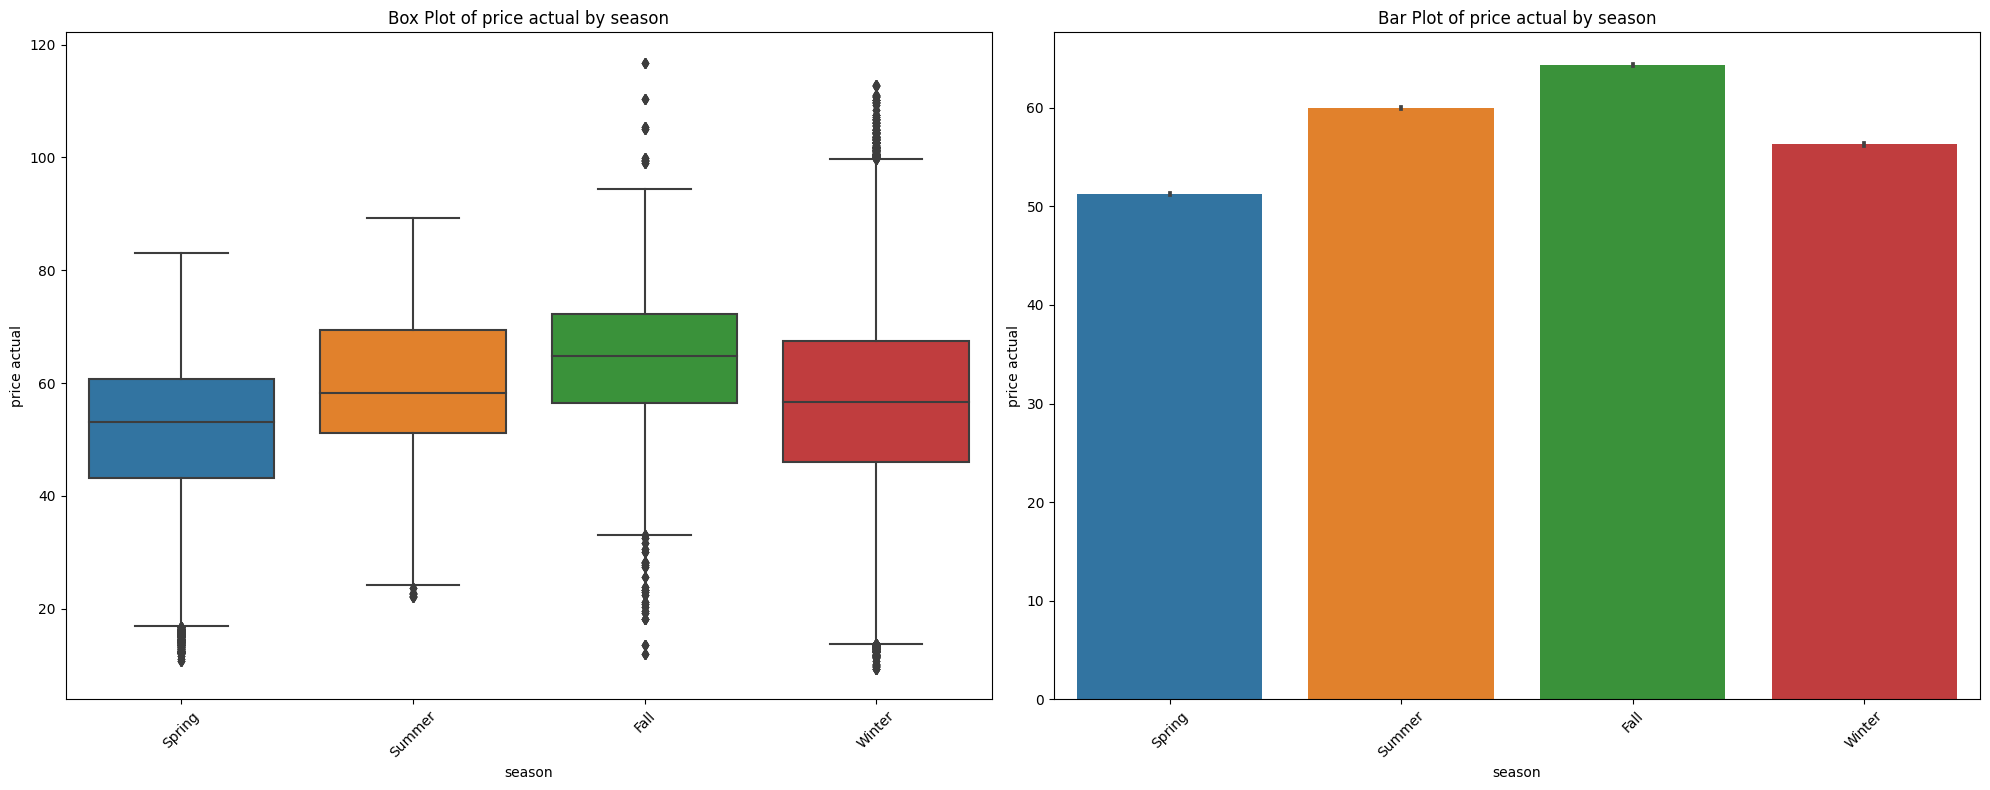

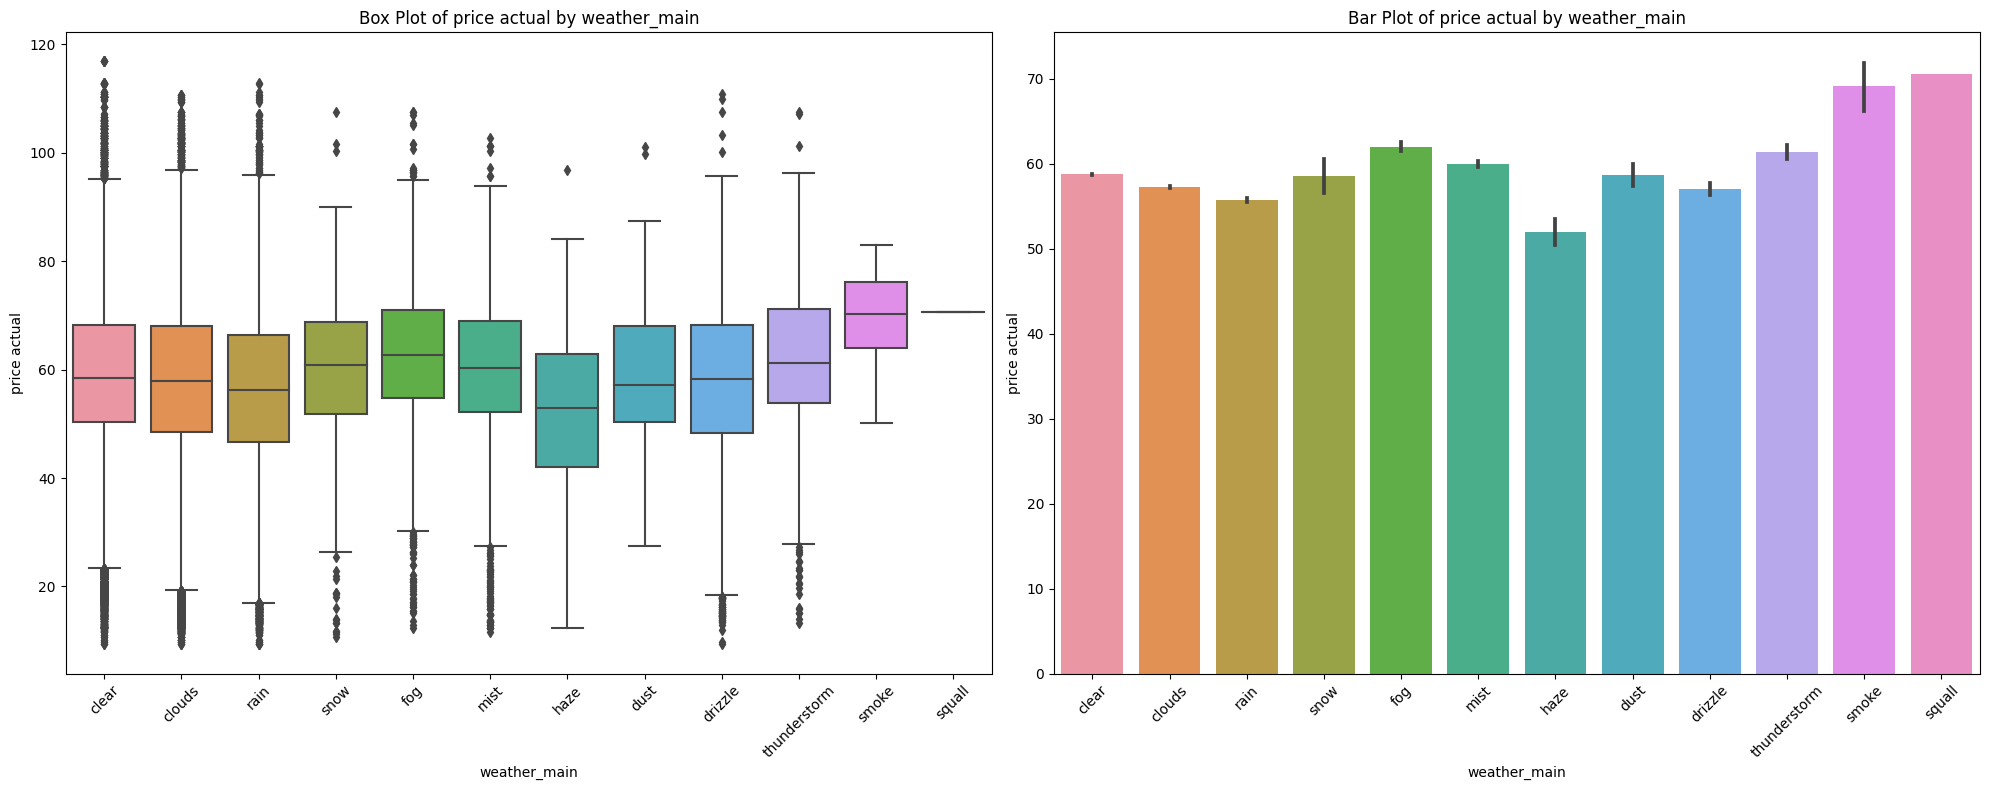

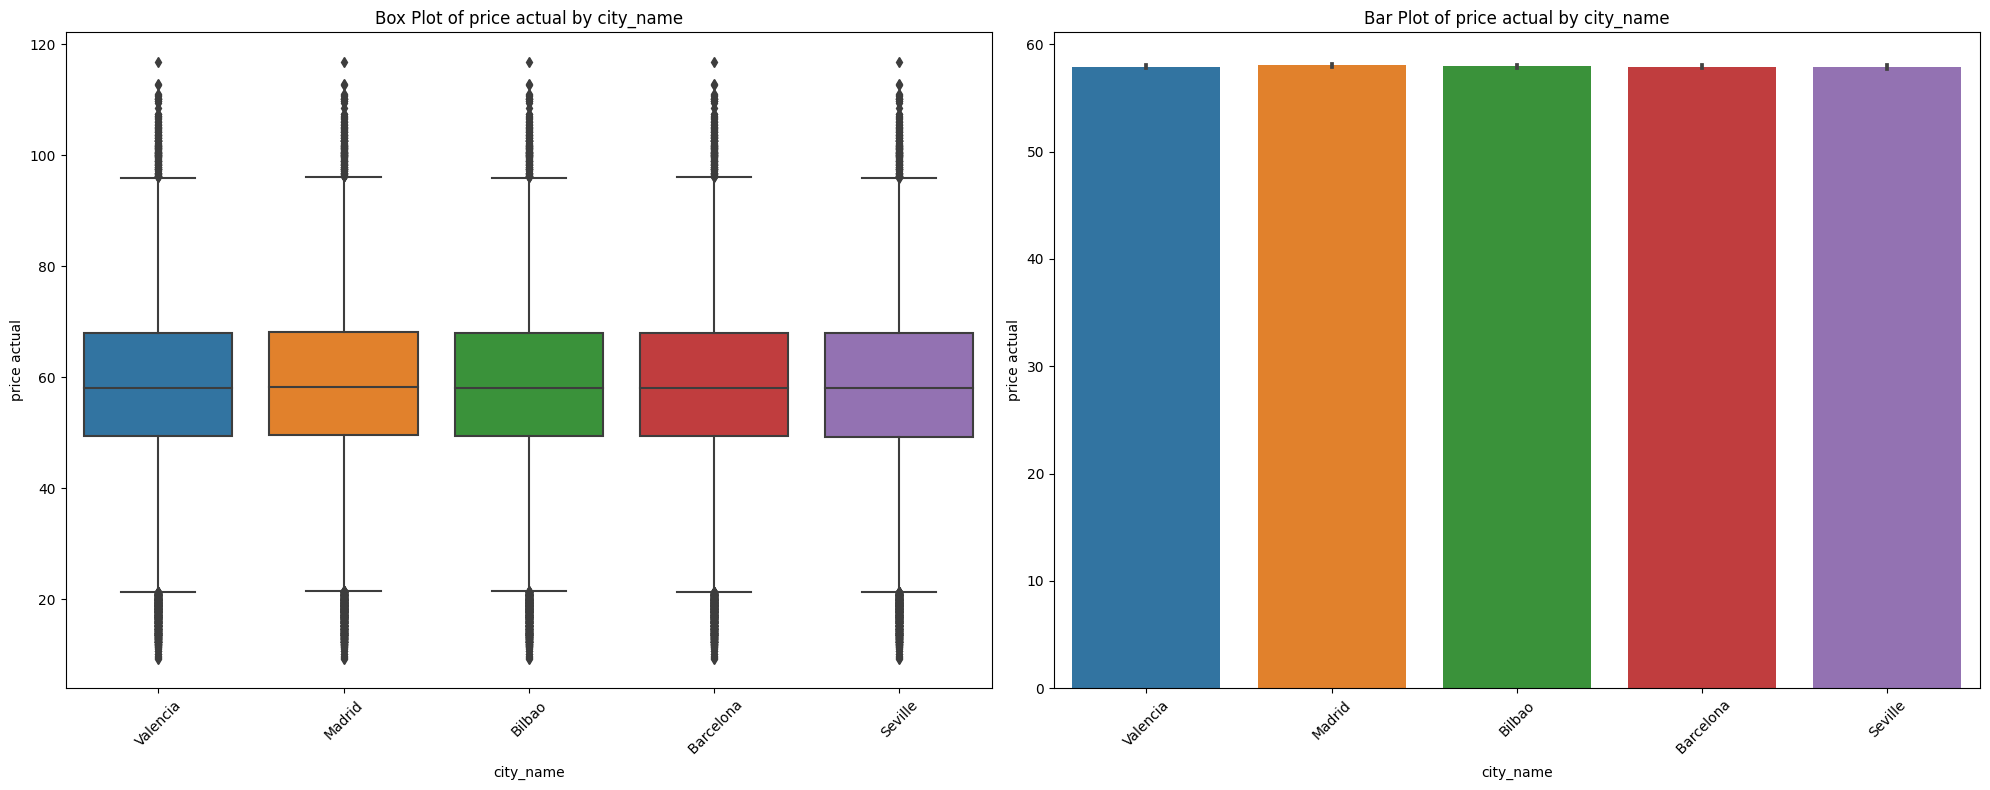

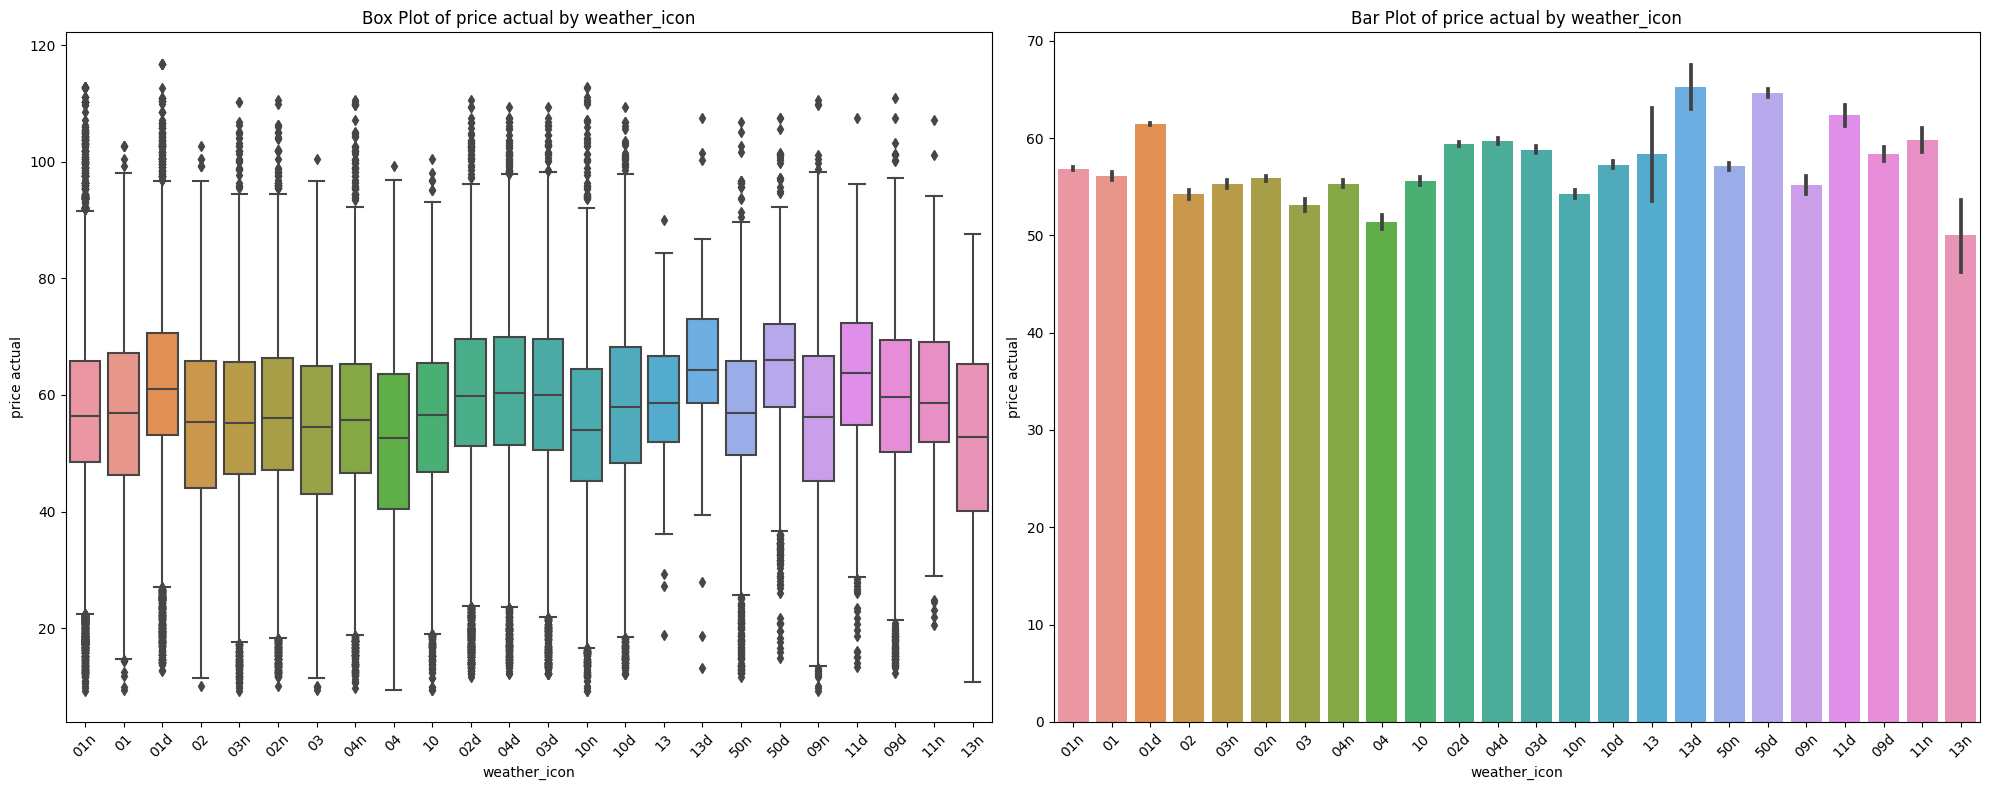

In [96]:
def create_plots(df, target_variable='price actual'):
    cat_columns = ['month', 'day', 'hour', 'year', 'day_name', 'quarter', 'season', 'weather_main', 'city_name', 'weather_icon']
    
    for col in cat_columns:
        plt.figure(figsize=(20, 8))
        
        # Create a box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=col, y=target_variable, data=df)
        plt.title(f'Box Plot of {target_variable} by {col}')
        plt.xticks(rotation=45)
        
        # Create a bar plot
        plt.subplot(1, 2, 2)
        sns.barplot(x=col, y=target_variable, data=df, estimator='mean')
        plt.title(f'Bar Plot of {target_variable} by {col}')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# Example usage:
create_plots(df)

### Observations:

1. Seasonality: The price actual is influenced by the season of the year, with higher prices in autumn and winter and lower prices in spring and summer.
2. Day of the Week: Certain days of the week have consistently higher prices than others, with Thursday and Saturday generally having higher prices and Tuesday and Wednesday having lower prices.
3. Month: The month of the year also plays a role in pricing, with some months having consistently higher prices than others.
4. Weather: Weather conditions can impact price actual. Clear, cloudy, and misty conditions are associated with higher prices, while rainy and snowy conditions tend to have lower prices.
5. Outliers: Outliers are present in the data, indicating unusual pricing events or data anomalies.


In [97]:
import pandas as pd
from scipy.stats import f_oneway

def perform_f_oneway_anova_and_remove(df: pd.DataFrame, cat_columns: list, target_variable: str):
    anova_results = {}

    for col in cat_columns:
        # Group data by the categorical column and extract the target variable values
        groups = [group[target_variable].values for name, group in df.groupby(col)]
        
        # Perform the one-way ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        
        anova_results[col] = p_value
        
        # Print the result
        print(f'ANOVA for {col}: F-statistic = {f_statistic}, p-value = {p_value}')
        
        # Check p-value and remove the column if it's greater than 0.05
        if p_value > 0.05:
            print(f'Result: {col} is NOT significantly related to {target_variable} (removing column)')
            df.drop(columns=col, inplace=True)
        else:
            print(f'Result: {col} is significantly related to {target_variable} (keeping column)')
        
        print('-'*50)

    return df, anova_results

# Example usage
cat_columns = ['month', 'day', 'hour', 'year', 'day_name', 'quarter', 'season', 'weather_main', 'city_name', 'weather_icon']
df, anova_results = perform_f_oneway_anova_and_remove(df, cat_columns, 'price actual')

# Display the cleaned DataFrame columns
print("Remaining columns in the DataFrame after ANOVA:")
print(df.columns)


ANOVA for month: F-statistic = 3251.666684519022, p-value = 0.0
Result: month is significantly related to price actual (keeping column)
--------------------------------------------------
ANOVA for day: F-statistic = 28.54144901337609, p-value = 2.5227757096853718e-160
Result: day is significantly related to price actual (keeping column)
--------------------------------------------------
ANOVA for hour: F-statistic = 1380.8617196422128, p-value = 0.0
Result: hour is significantly related to price actual (keeping column)
--------------------------------------------------
ANOVA for year: F-statistic = 10439.395121447184, p-value = 0.0
Result: year is significantly related to price actual (keeping column)
--------------------------------------------------
ANOVA for day_name: F-statistic = 1611.08332790823, p-value = 0.0
Result: day_name is significantly related to price actual (keeping column)
--------------------------------------------------
ANOVA for quarter: F-statistic = 6952.80049578

### Keeping all the categories columns since p_value is greater than 0.05. Check via ANOVA hypothesis testing since there are more than 2 categories in each features.

In [98]:
def perform_chi2_test_and_drop(df: pd.DataFrame, cat_cols: list, target_variable: str):
    chi2_results = {}

    for col in cat_cols:
        # Create a contingency table for the categorical column and the target variable
        contingency_table = pd.crosstab(df[col], df[target_variable])
        
        # Perform the Chi-squared test
        chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)
        
        chi2_results[col] = p_value
        
        # Print the result
        print(f'Chi-squared test for {col}: Chi2-statistic = {chi2_stat}, p-value = {p_value}, Degrees of Freedom = {dof}')
        
        # Check p-value and print the result
        if p_value < 0.05:
            print(f'Result: {col} is significantly related to {target_variable} (p < 0.05)')
        else:
            print(f'Result: {col} is NOT significantly related to {target_variable} (p >= 0.05)')
            # Drop the column if p-value is greater than 0.05
            df.drop(columns=col, inplace=True)
            print(f'Dropped column: {col}')
        
        print('-'*50)

    return chi2_results, df

# Example usage
cat_cols = ['weather_main', 'weather_description', 'weather_icon']
chi2_results, df = perform_chi2_test_and_drop(df, cat_cols, 'price actual')

# Display the p-values for each test
print("Chi-squared test p-values:")
print(chi2_results)

# Display the updated DataFrame
print("Updated DataFrame columns:")
print(df.shape)

Chi-squared test for weather_main: Chi2-statistic = 84793.38712729601, p-value = 2.7381089584986256e-188, Degrees of Freedom = 73040
Result: weather_main is significantly related to price actual (p < 0.05)
--------------------------------------------------
Chi-squared test for weather_description: Chi2-statistic = 377914.6795722903, p-value = 0.0, Degrees of Freedom = 278880
Result: weather_description is significantly related to price actual (p < 0.05)
--------------------------------------------------
Chi-squared test for weather_icon: Chi2-statistic = 249273.514181722, p-value = 0.0, Degrees of Freedom = 152720
Result: weather_icon is significantly related to price actual (p < 0.05)
--------------------------------------------------
Chi-squared test p-values:
{'weather_main': 2.7381089584986256e-188, 'weather_description': 0.0, 'weather_icon': 0.0}
Updated DataFrame columns:
(178140, 34)


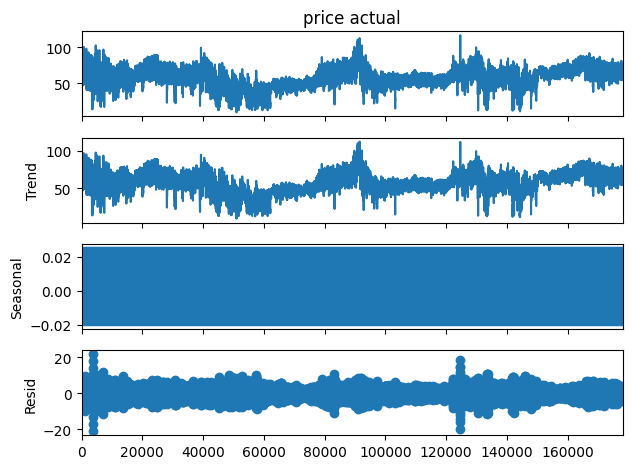

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['price actual'], model='additive', period=12)  # Set appropriate period
decomposition.plot()
plt.show()

#### The time series graph you provided is a result of decomposing the "price actual" column in a pandas DataFrame into its trend, seasonal, and residual components using the seasonal_decompose function from the statsmodels library.


1. Trend: This component captures the long-term, overall direction of the series. In the plot, the trend component appears to be relatively flat, suggesting that there is no strong upward or downward trend in the data.
2. Seasonal: This component captures the periodic fluctuations in the series. In the plot, the seasonal component is a horizontal line at zero, indicating that there is no clear seasonal pattern in the data.
3. Residual: This component is the remainder after removing the trend and seasonal components. It represents the noise or random fluctuations in the data. In the plot, the residual component appears to be relatively stationary and random.

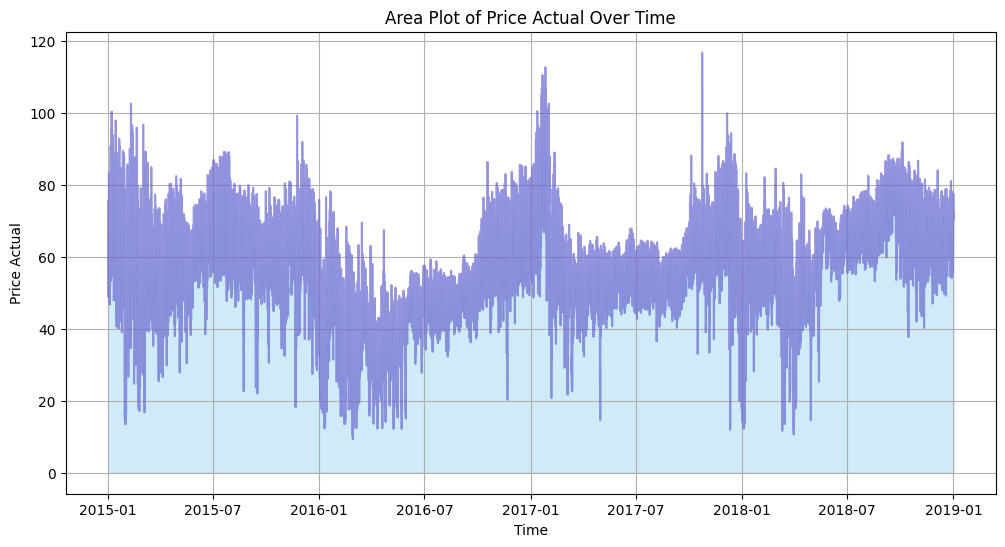

In [100]:
plt.figure(figsize=(12, 6))
plt.fill_between(df['time'], df['price actual'], color="skyblue", alpha=0.4)
plt.plot(df['time'], df['price actual'], color="Slateblue", alpha=0.6)
plt.title('Area Plot of Price Actual Over Time')
plt.xlabel('Time')
plt.ylabel('Price Actual')
plt.grid()
plt.show()

In [101]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation other',
       'generation other renewable', 'generation solar', 'generation waste',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual', 'temp',
       'temp_min', 'temp_max', 'wind_speed'],
      dtype='object')

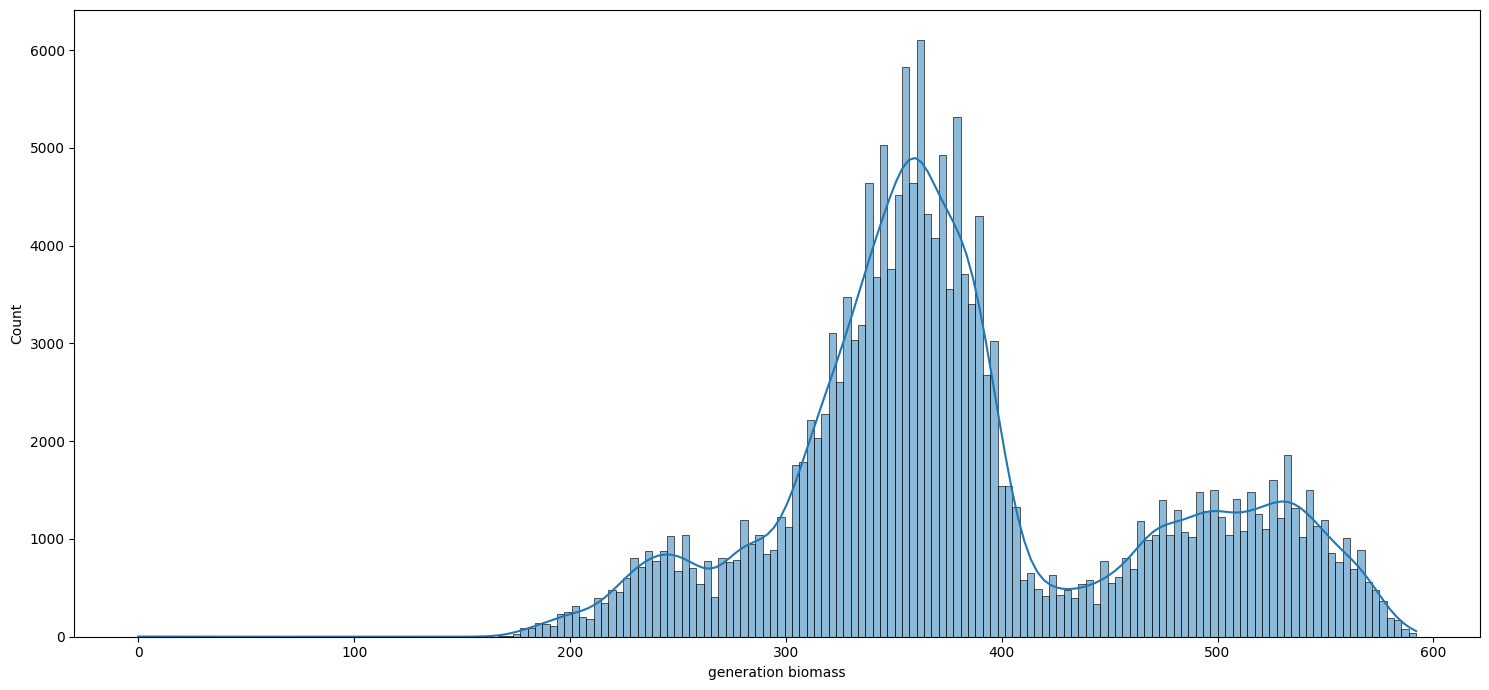

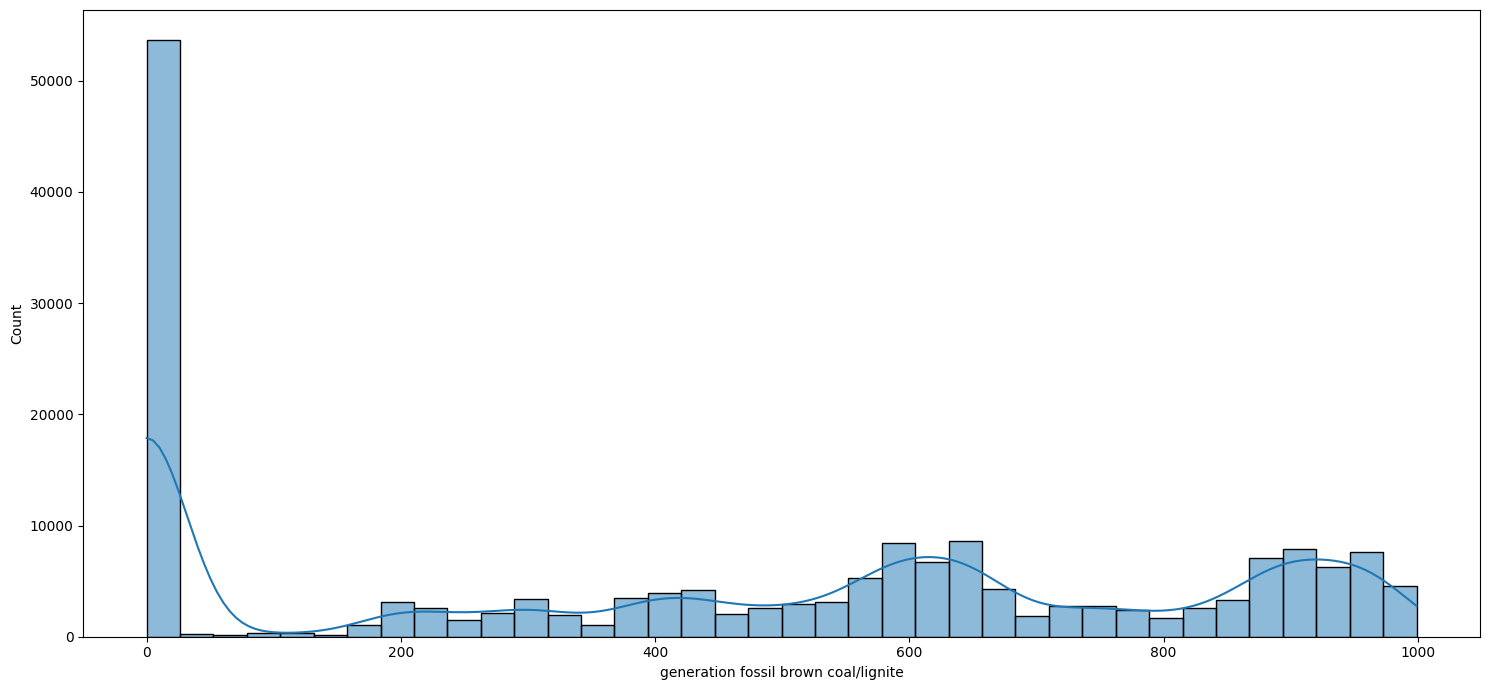

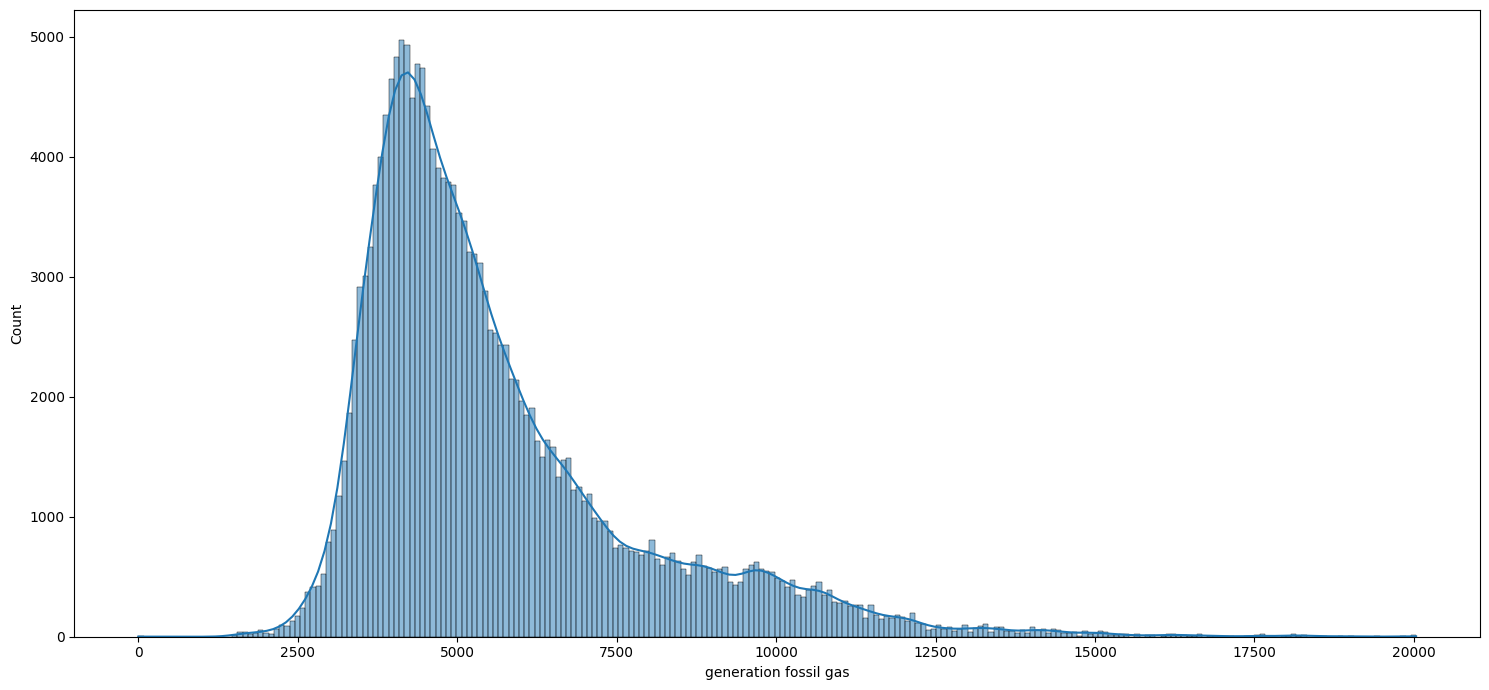

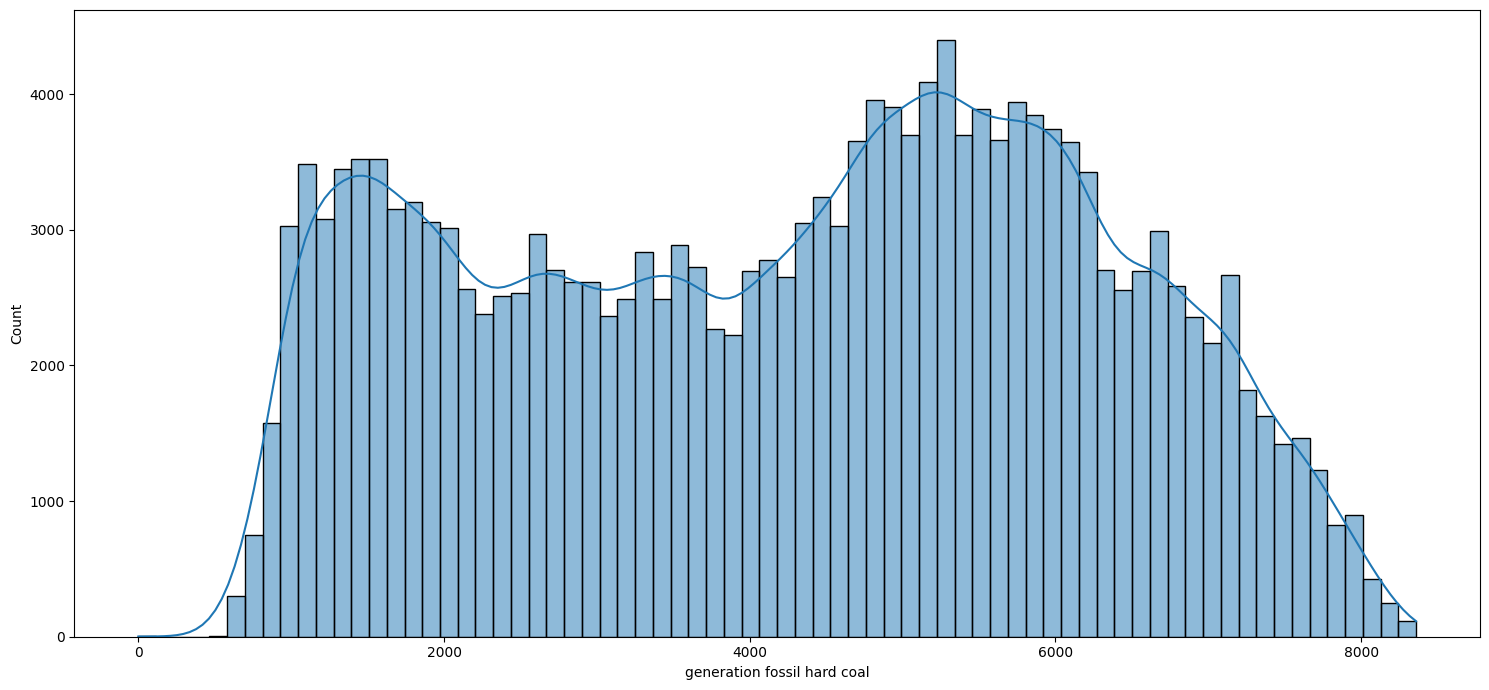

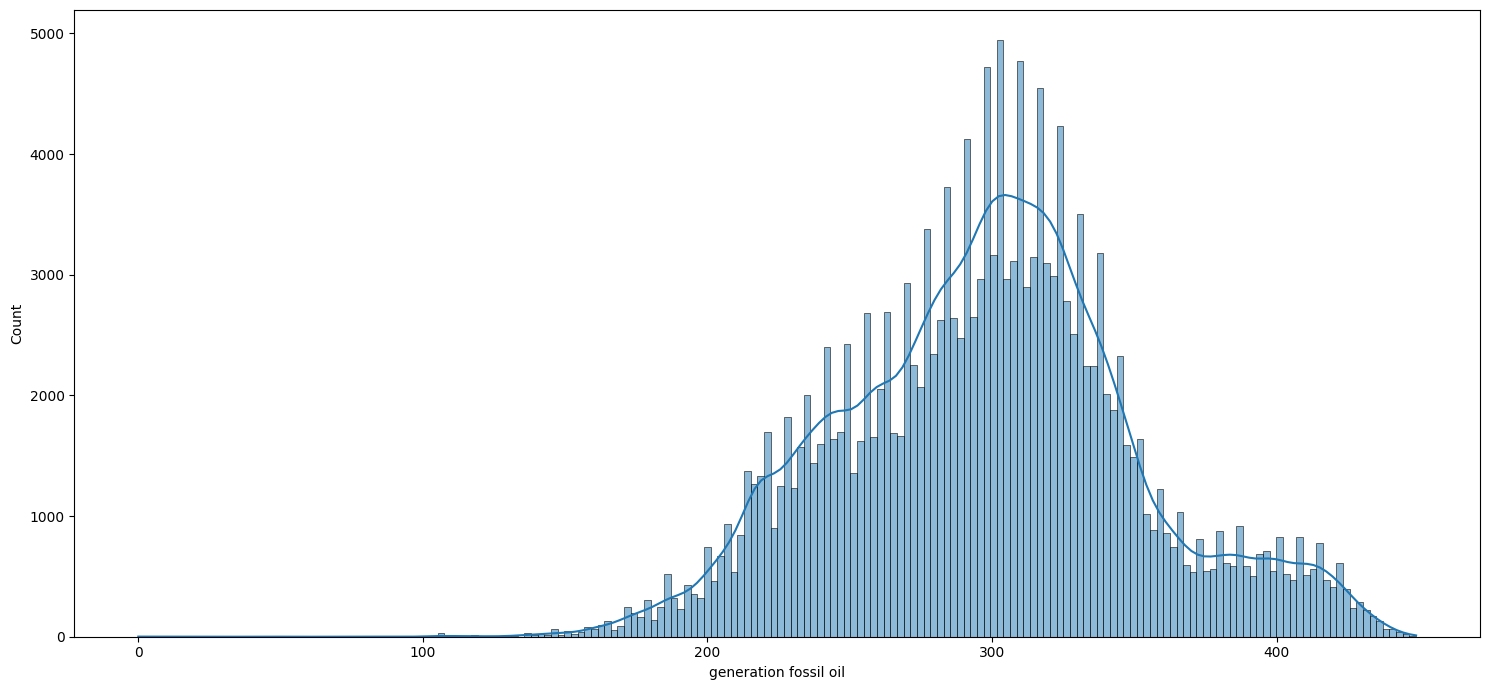

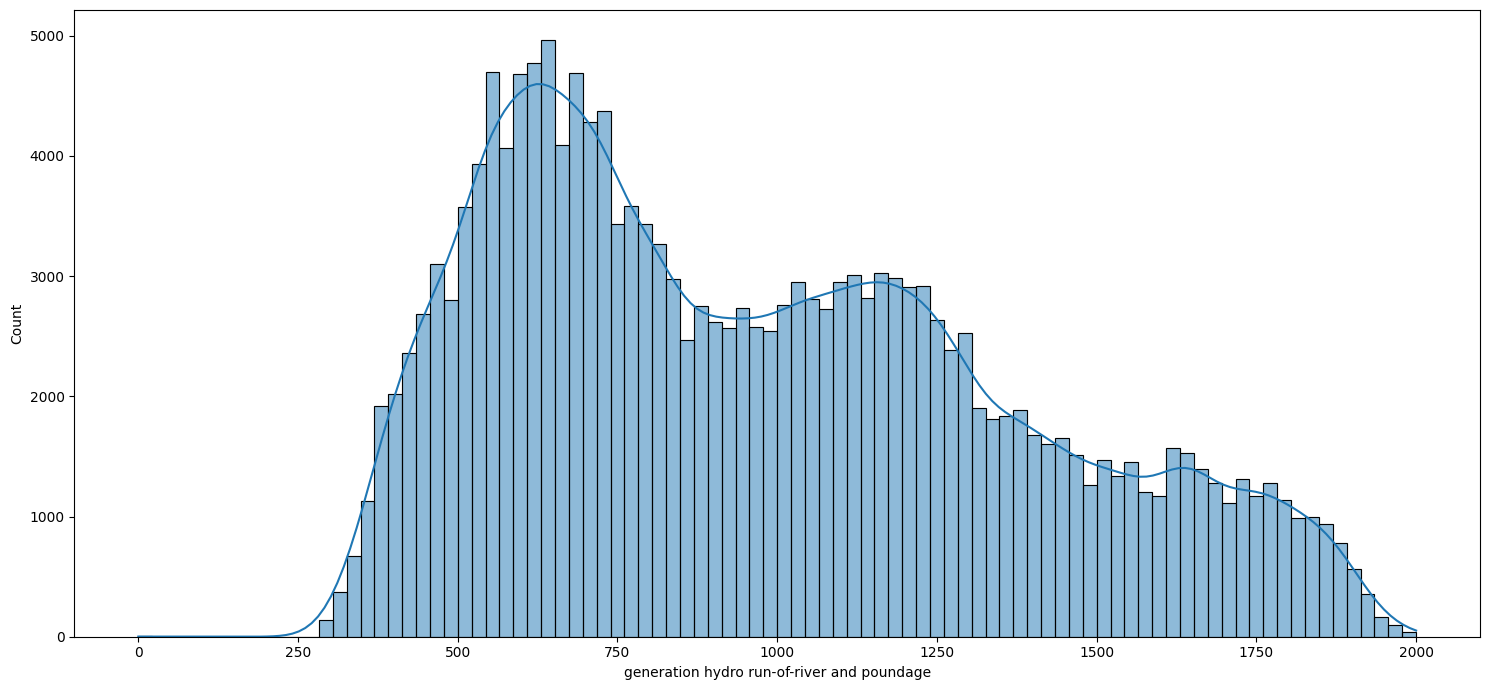

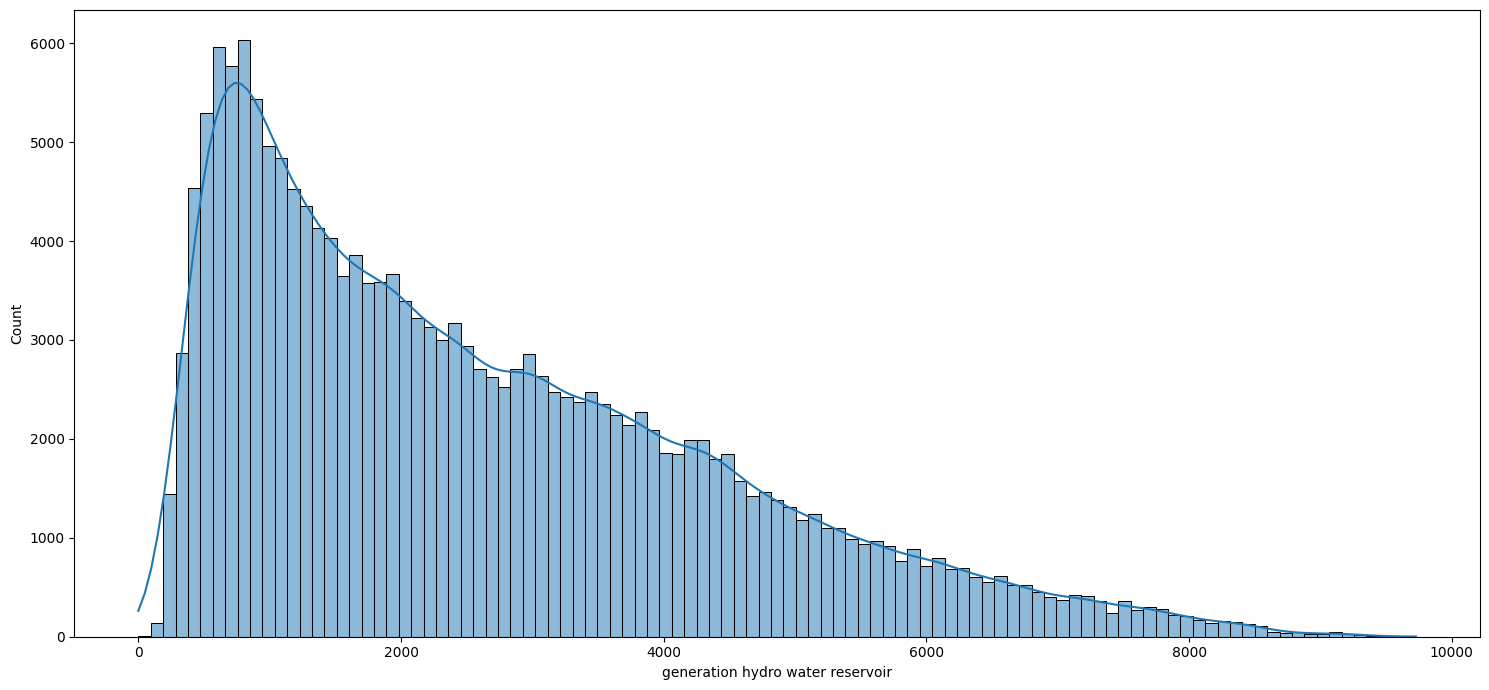

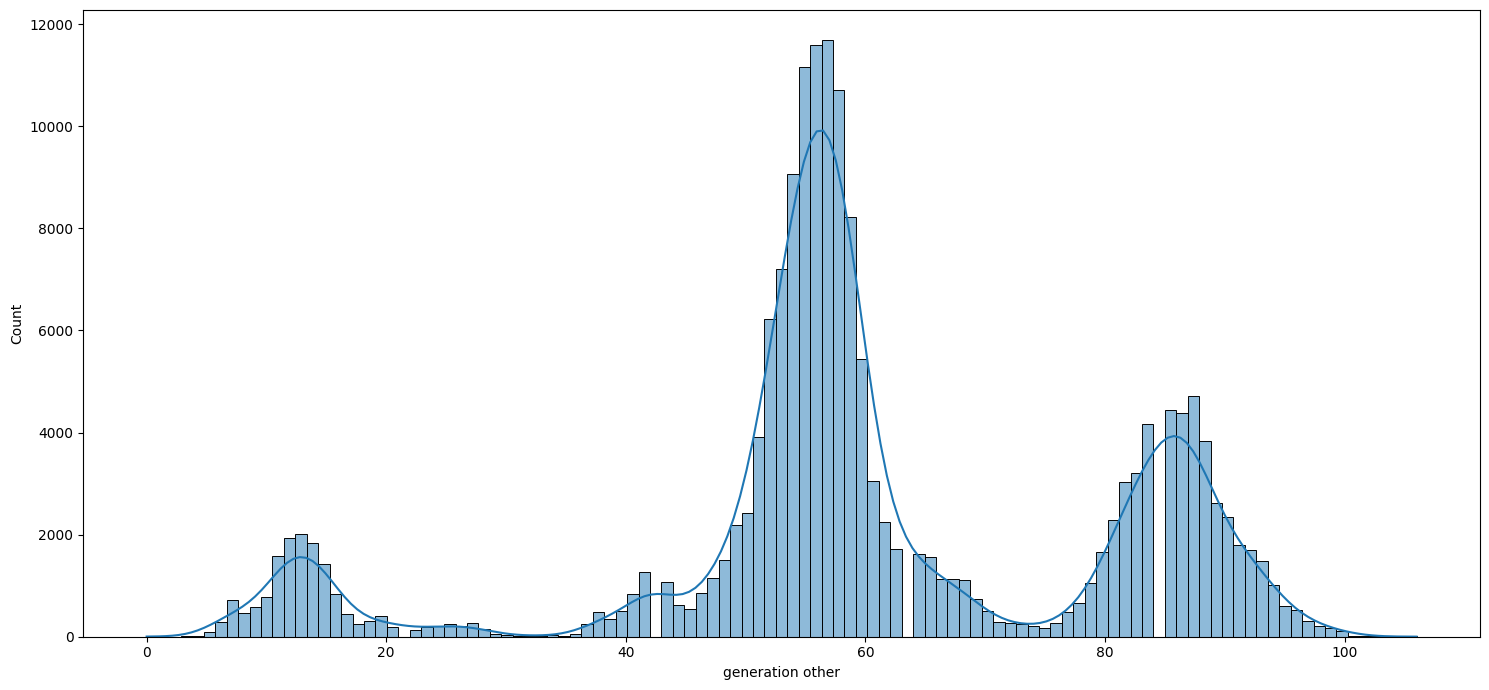

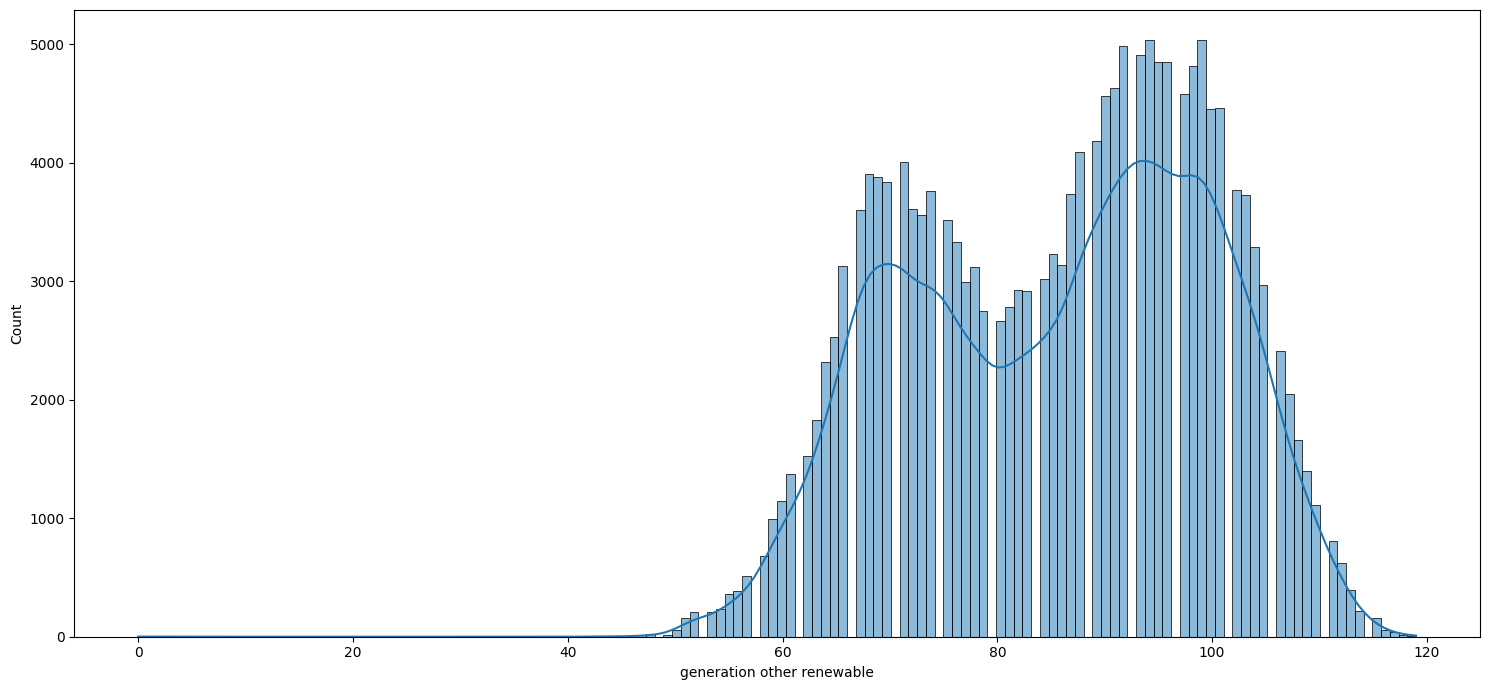

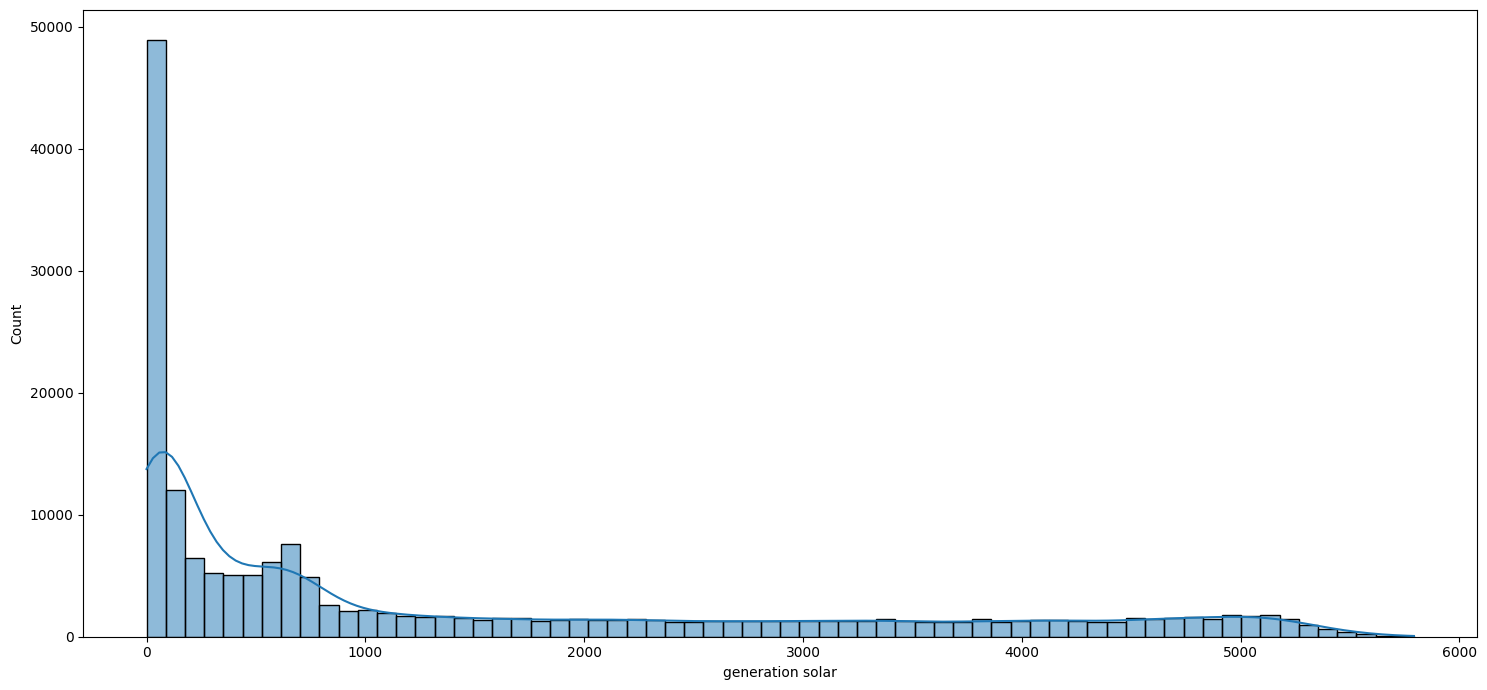

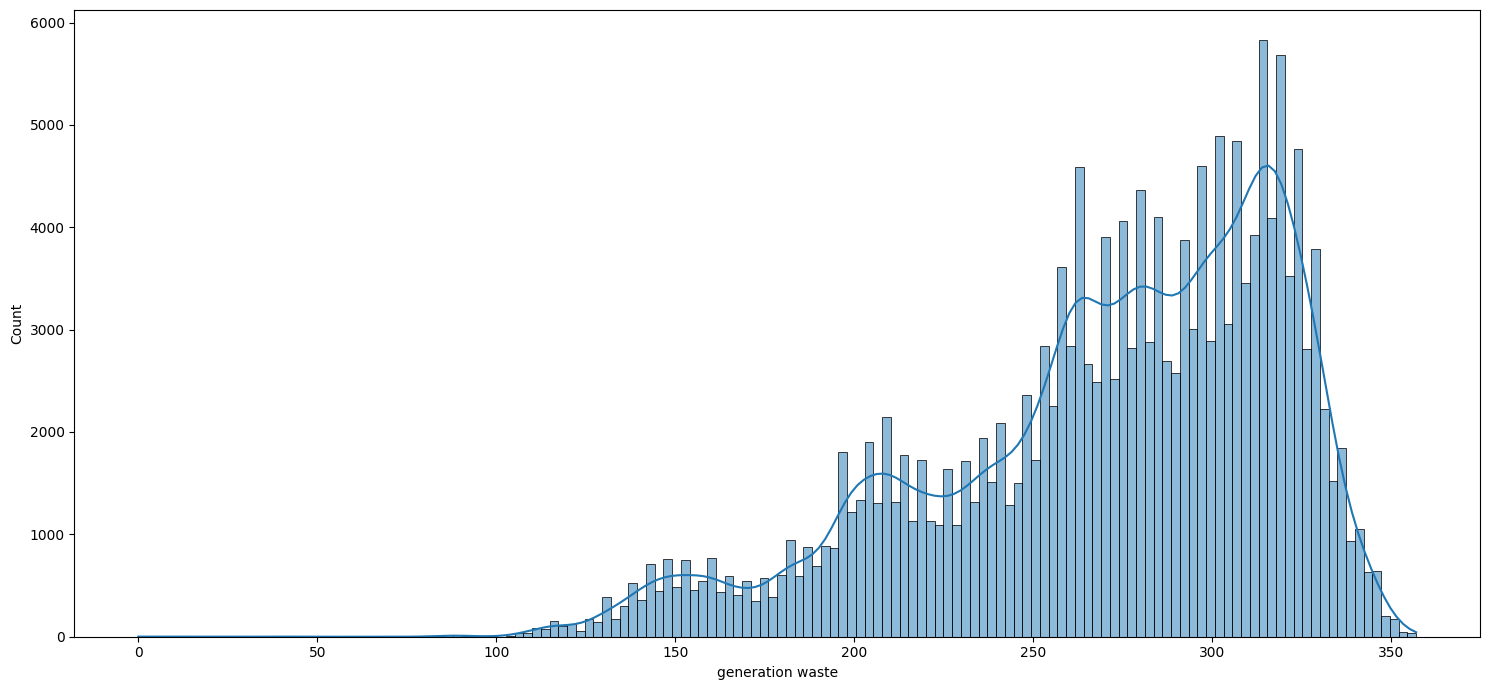

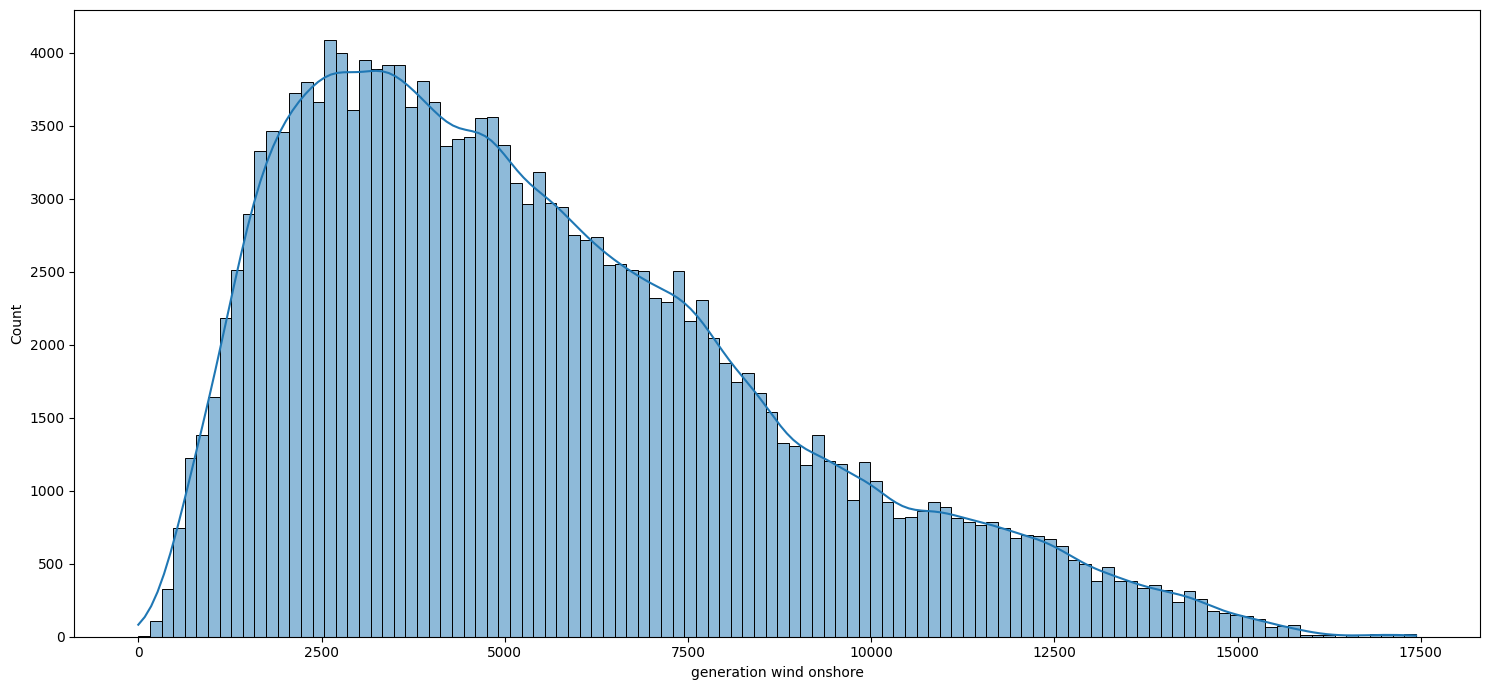

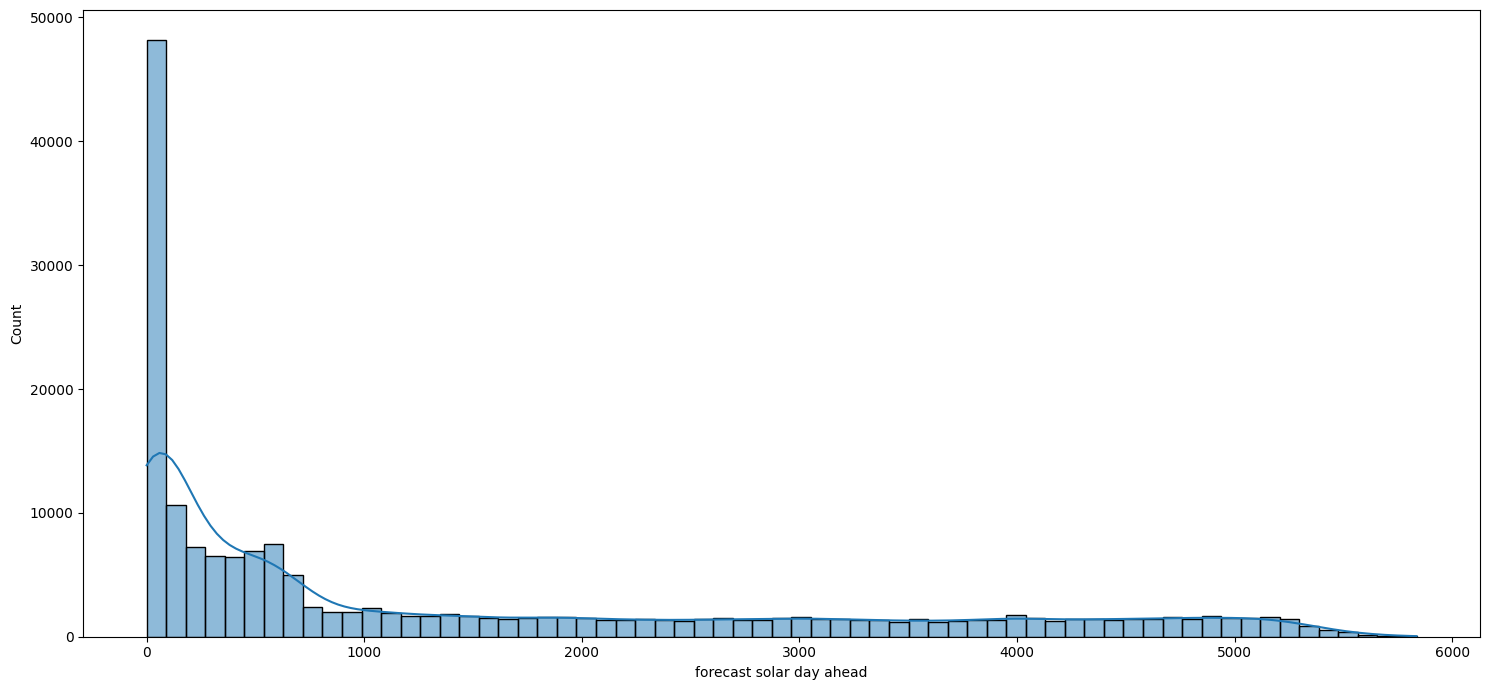

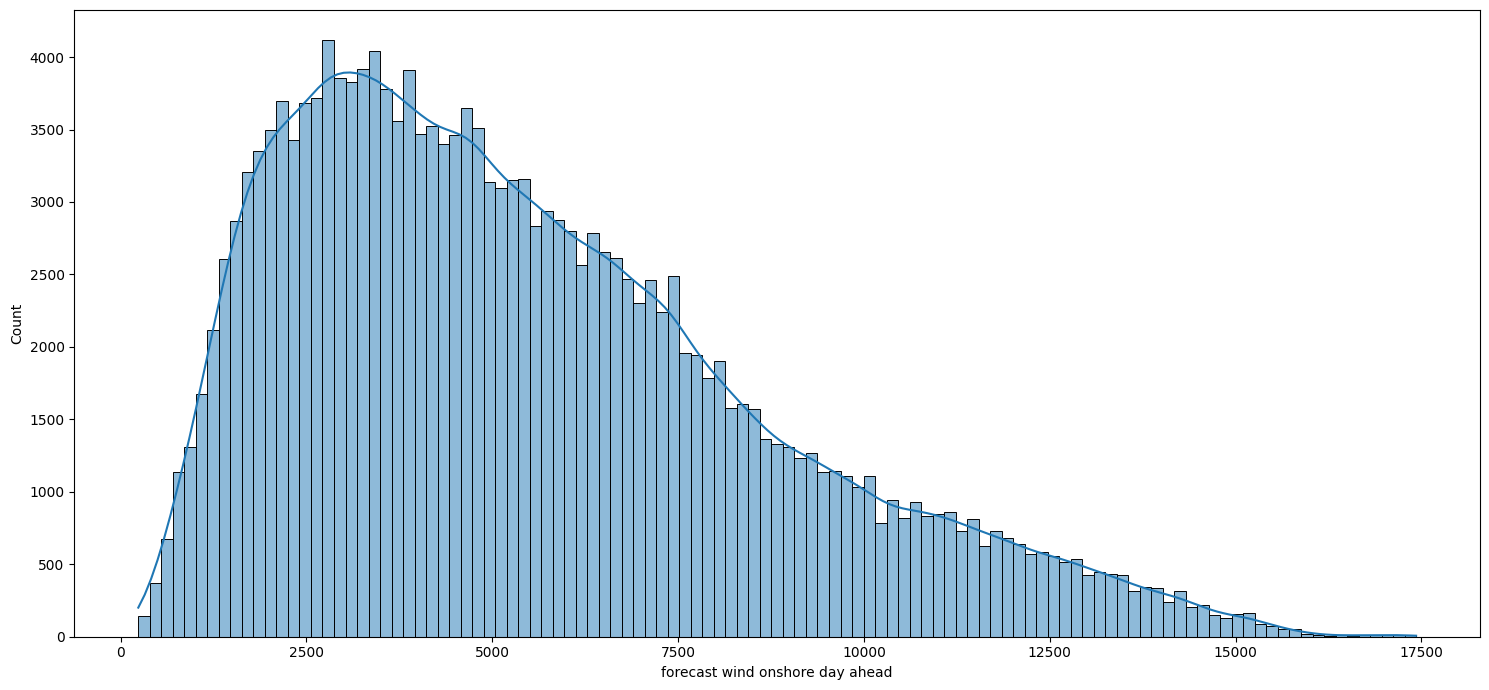

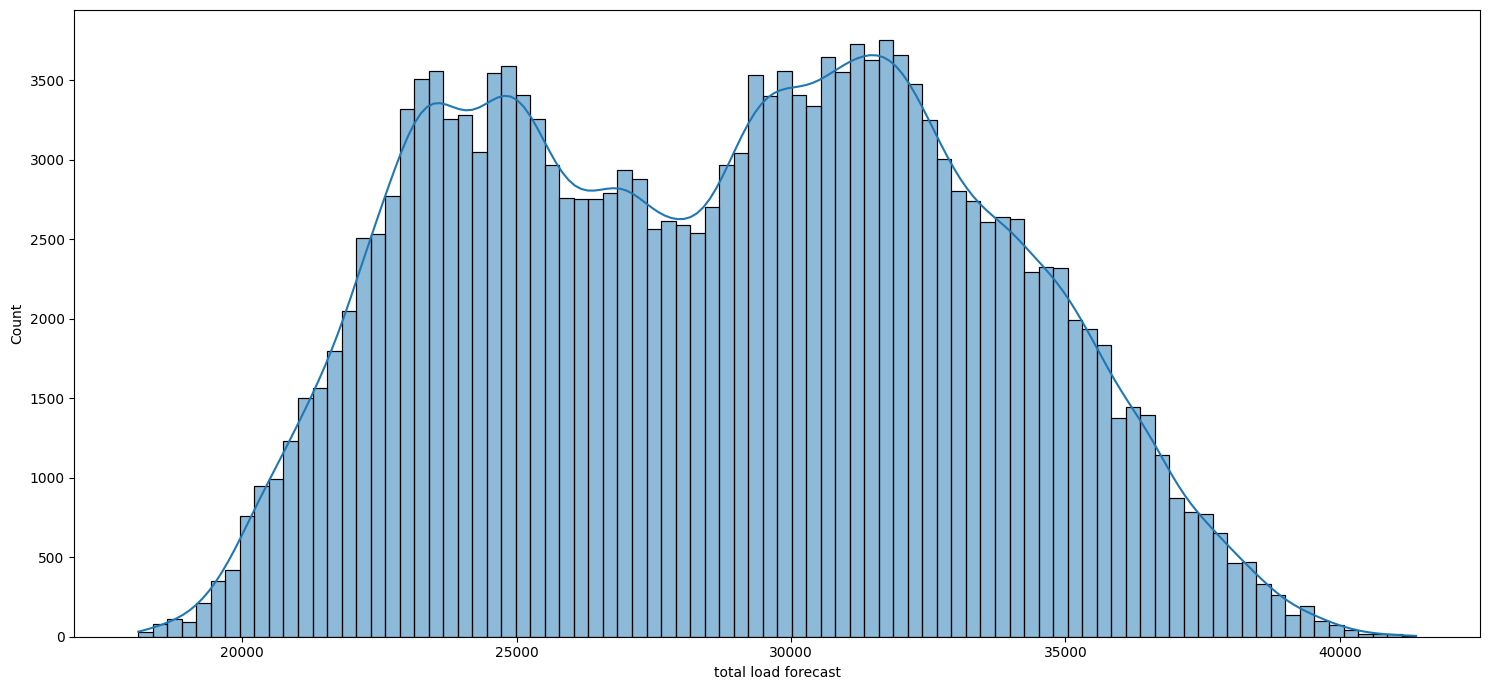

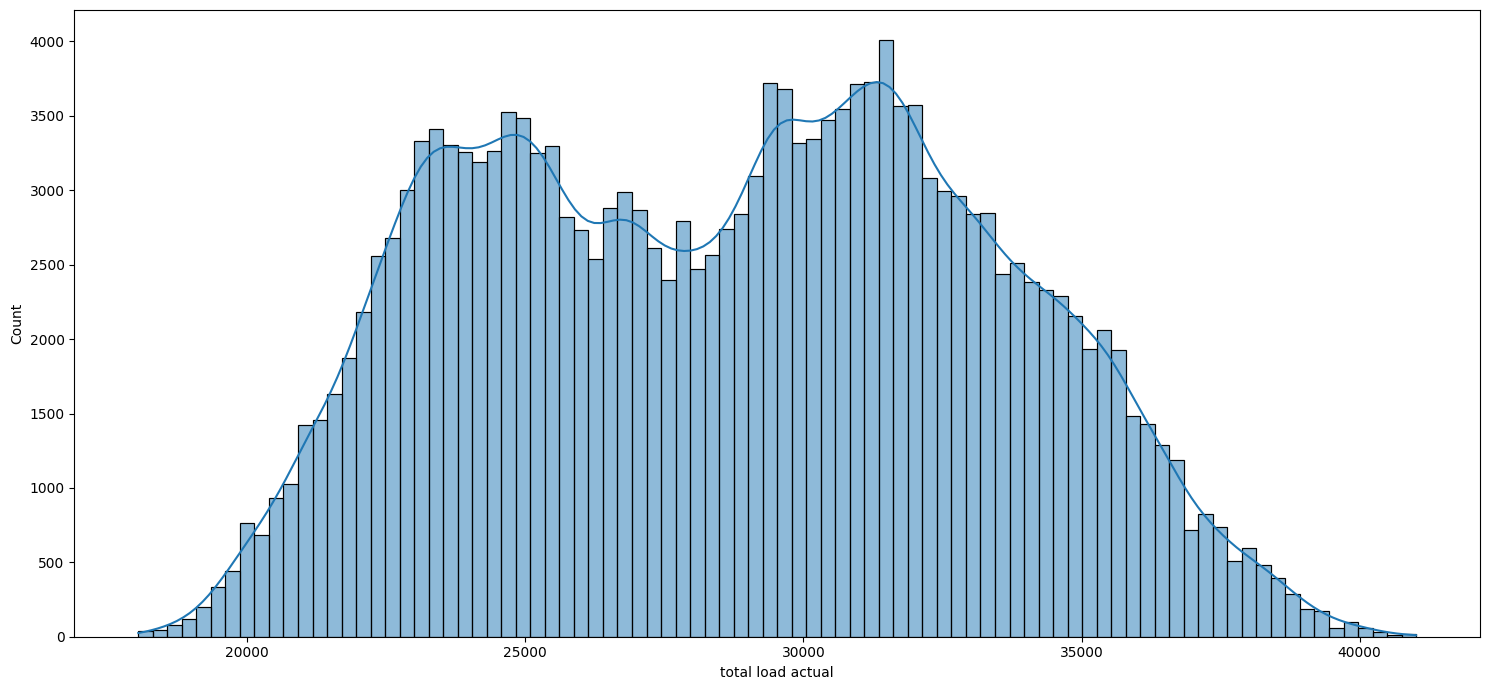

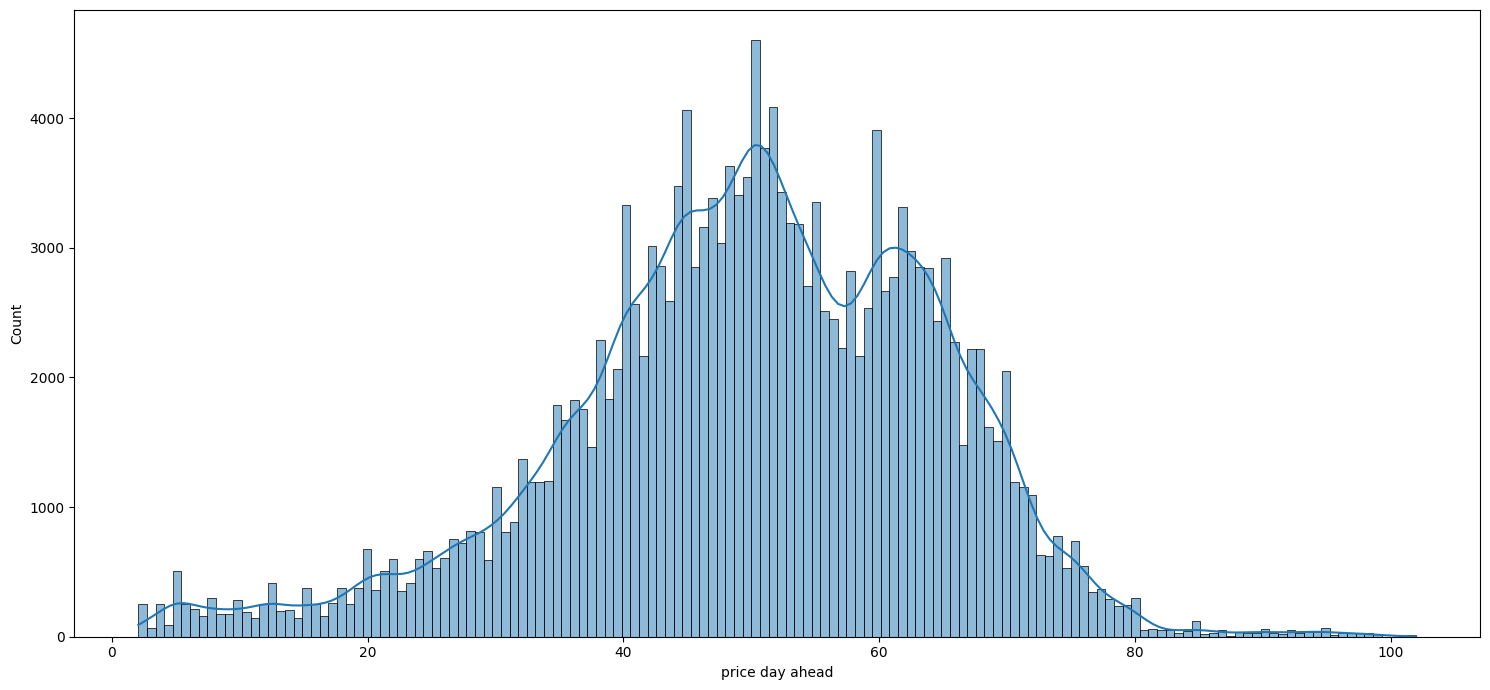

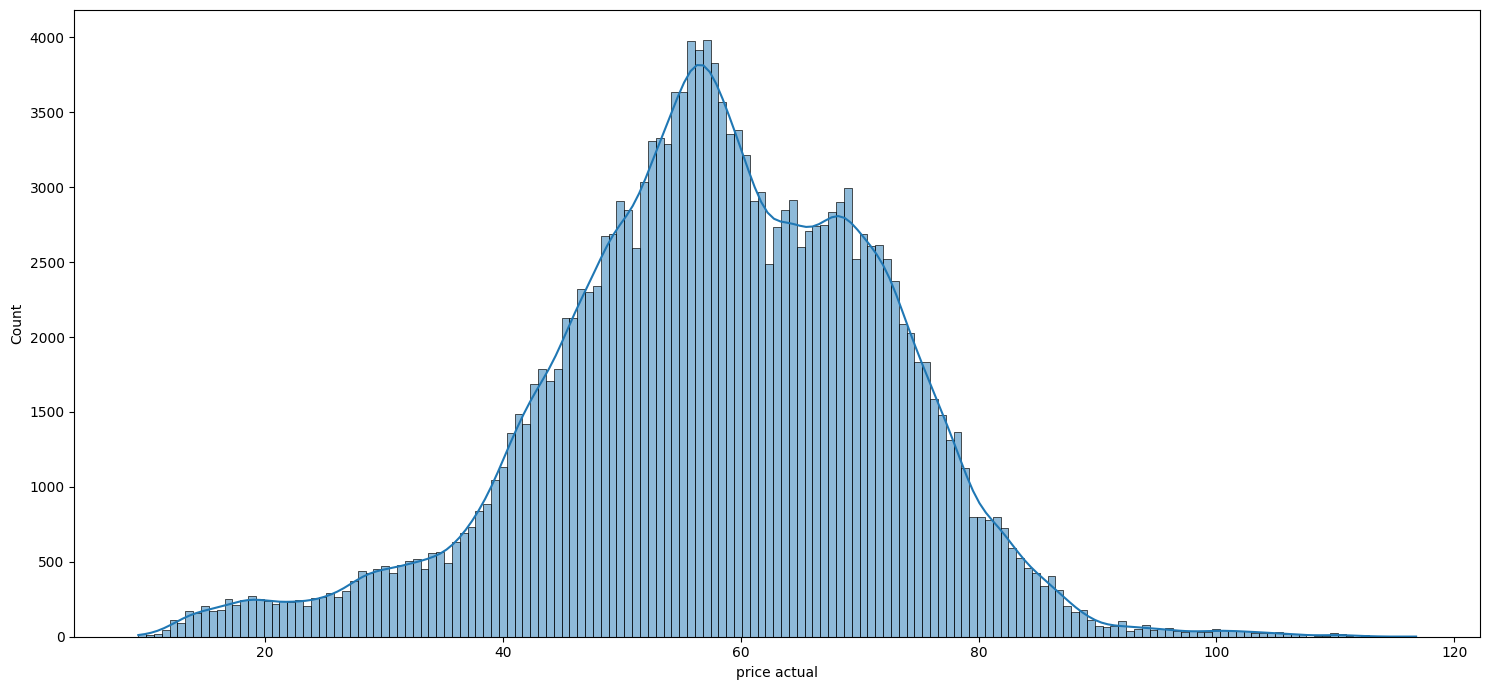

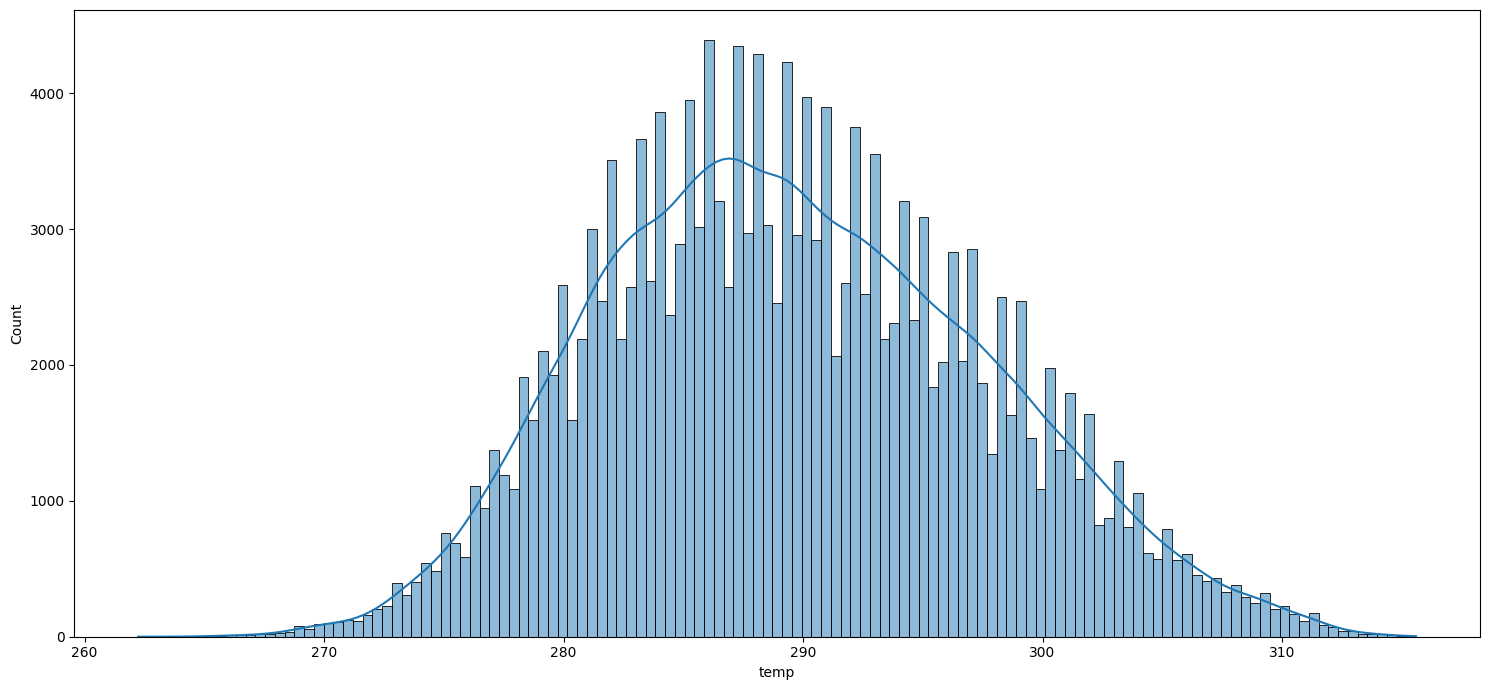

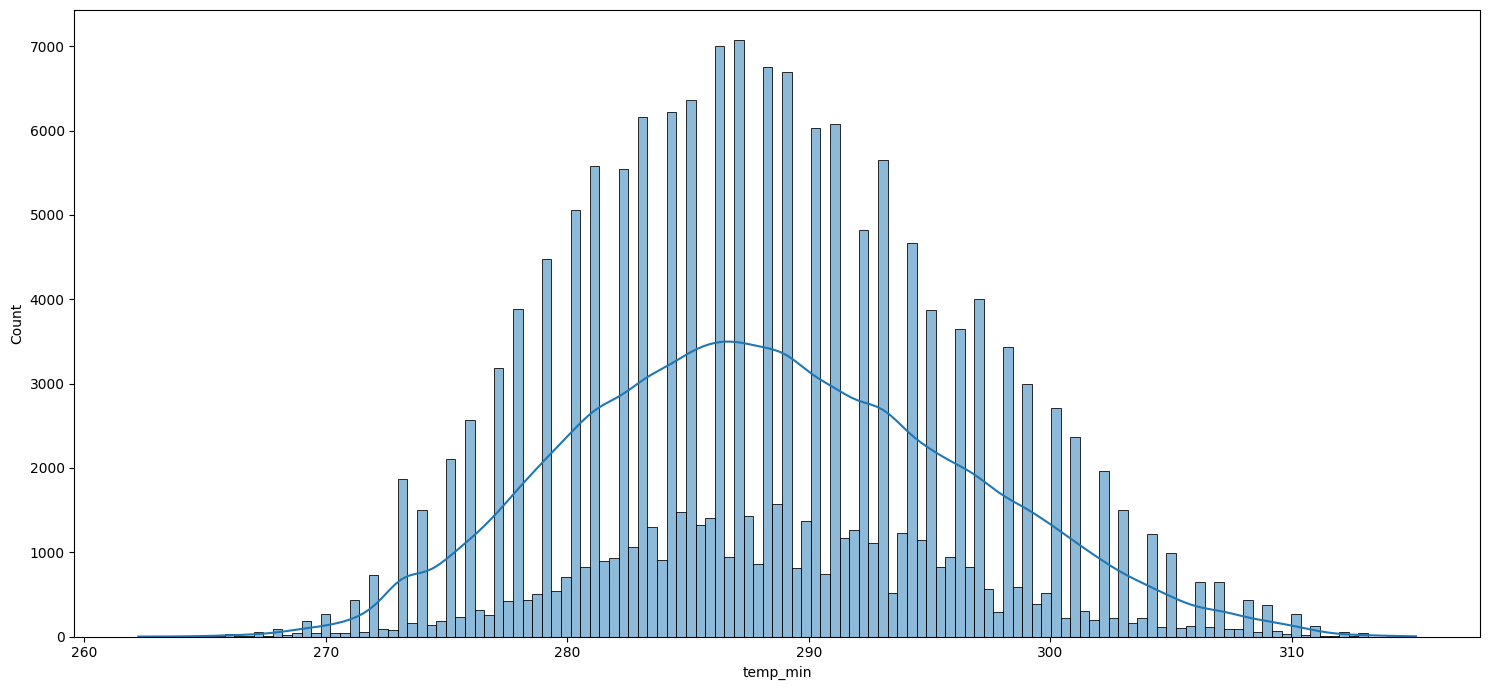

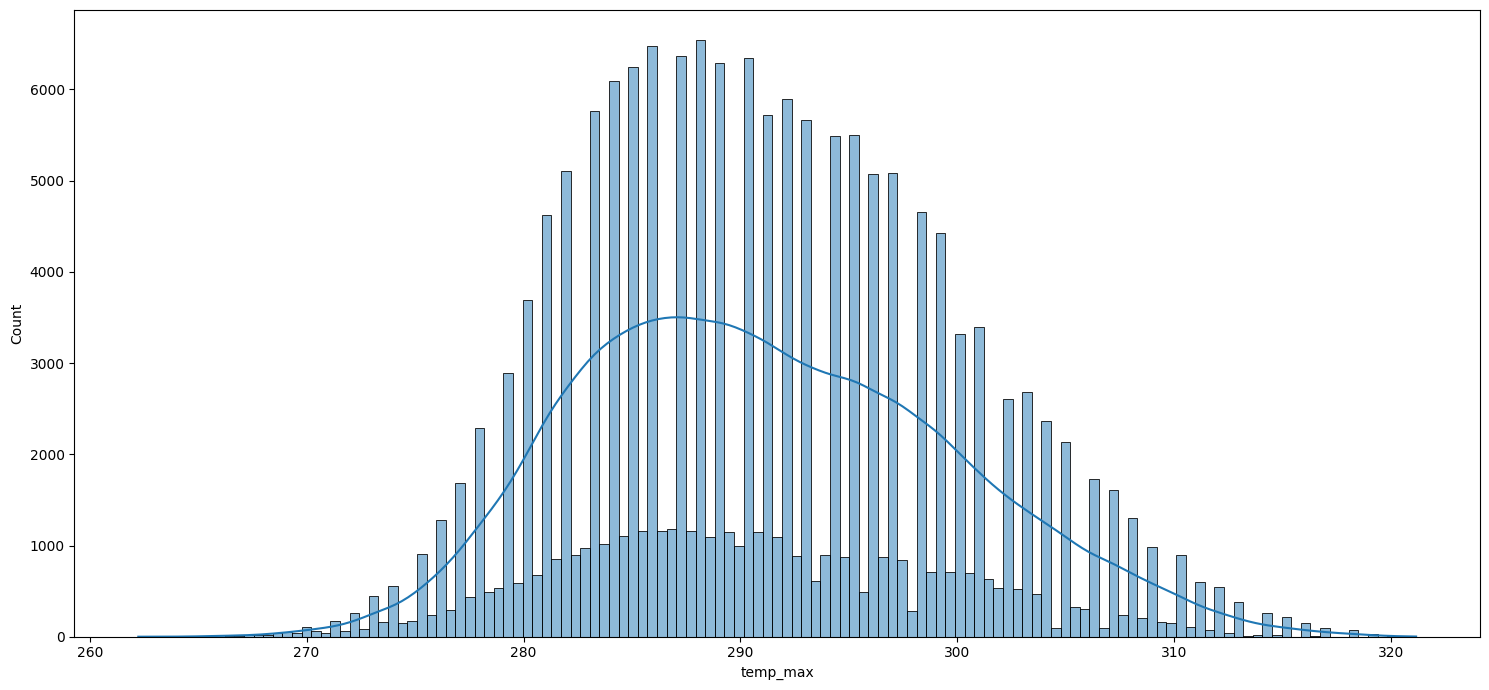

In [102]:
numerical_features = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation other',
       'generation other renewable', 'generation solar', 'generation waste',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual', 'temp',
       'temp_min', 'temp_max']
for col in numerical_features:
    plt.figure(figsize=(15,7))
    sns.histplot(data=df, x=col, kde=True)
    plt.tight_layout()
    plt.show()

In [103]:
df['price actual'].min(), df['price actual'].max()

(9.33, 116.8)

In [104]:
df.shape

(178140, 34)

In [105]:
df[['time', 'weather_main', 'weather_description', 'weather_icon', 'price actual']].sample(20)

,time,weather_main,weather_description,weather_icon,price actual
87444,2016-12-23 20:00:00+00:00,clear,sky is clear,01n,77.00
144654,2018-04-02 22:00:00+00:00,clouds,few clouds,02n,34.64
25618,2015-08-03 04:00:00+00:00,clear,sky is clear,01n,66.72
163666,2018-09-06 09:00:00+00:00,clear,sky is clear,01d,81.50
125581,2017-10-31 15:00:00+00:00,clouds,few clouds,02d,66.82
93548,2017-02-10 21:00:00+00:00,clouds,scattered clouds,03n,74.54
109376,2017-06-20 06:00:00+00:00,clear,sky is clear,01d,60.64
62348,2016-05-31 16:00:00+00:00,clouds,few clouds,02d,44.61
41420,2015-12-11 08:00:00+00:00,clouds,scattered clouds,03,77.22
171087,2018-11-05 10:00:00+00:00,clouds,few clouds,02d,73.04


### Observations:

1. weather_description column give more detail description of weather. However, short description is already given by weather_main. Therefore, removing weather_description can be helpful in reducing dimensionality of the dataset. 
2. Similarily, weather_icon is a way of representing different weather_description. Removing weather_icon won't distort the helping of the dataset.

In [106]:
df['weather_main'].unique()

array(['clear', 'clouds', 'rain', 'snow', 'fog', 'mist', 'haze', 'dust',
       'drizzle', 'thunderstorm', 'smoke', 'squall'], dtype=object)

In [107]:
df['price actual'].min(), df['price actual'].max()
bins = [9, 46, 81, 117]
labels = ['low price', 'medium price', 'high price']
df['price bins'] = pd.cut(df['price actual'], bins=bins, labels=labels)



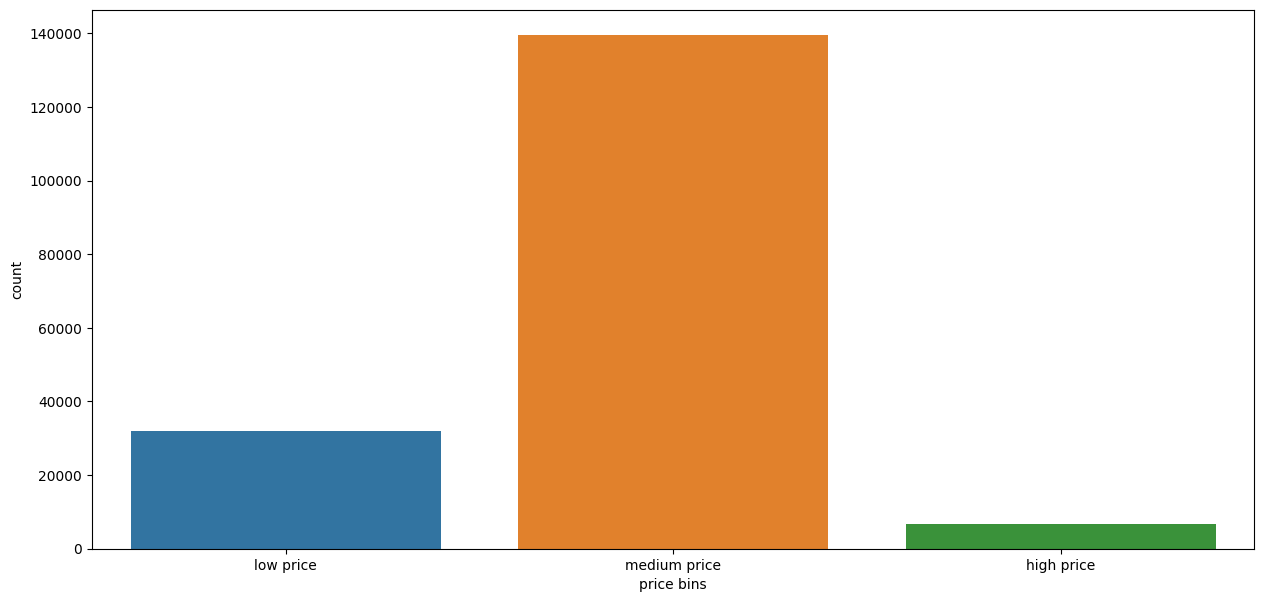

In [108]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='price bins')
plt.show()

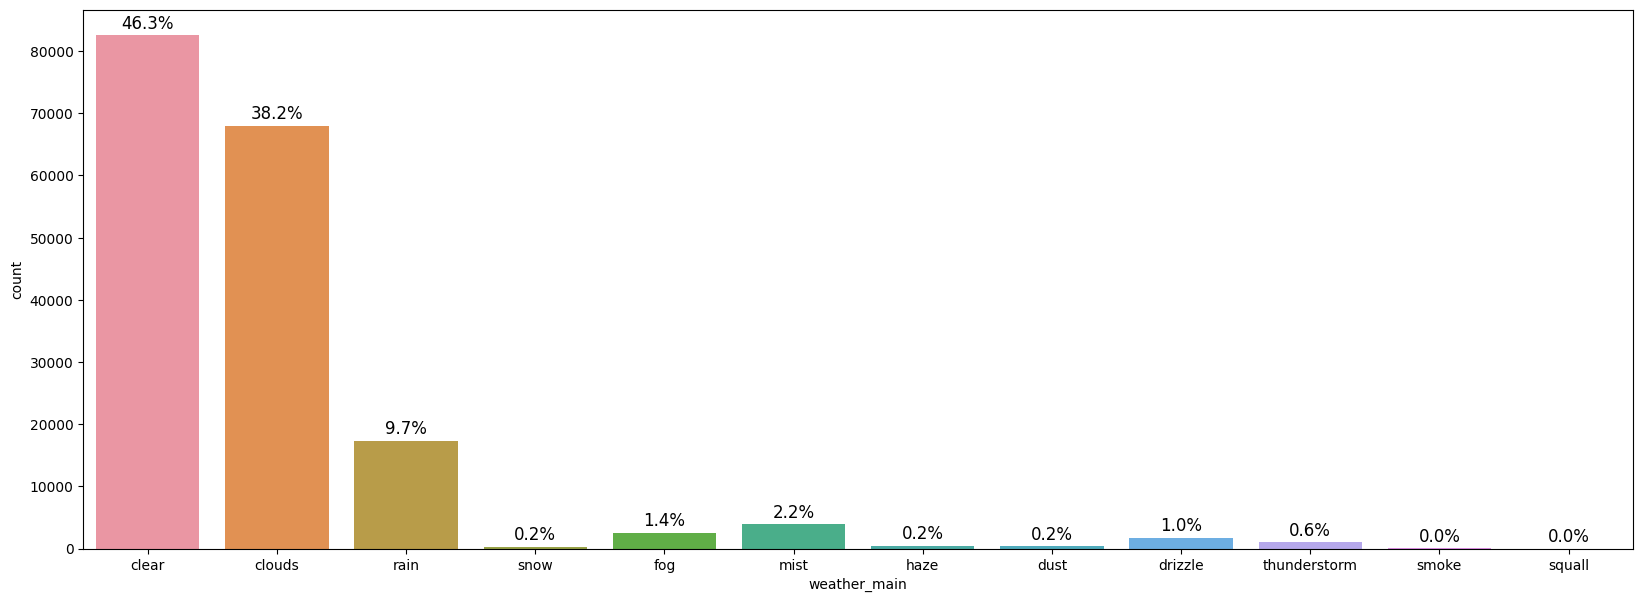

In [109]:
total = len(df)
plt.figure(figsize=(20, 7))
ax = sns.countplot(data=df, x='weather_main')

# Add percentage annotations to the bars
for p in ax.patches:
    count = p.get_height()  # Get the count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')  # Add percentage annotation

# Display the plot
plt.show()

##### Since ['clear', 'clouds', 'rain', 'fog', 'mist', 'drizzle'] categories from weather_main make upto 97% of the data, for simplification we are converting remaining categories into one of these 5 categories by grouping price bins columns. 

In [110]:
def replace_weather_categories(df, weather_column, price_bins_column, categories_to_keep):
    
    """
    Replace categories in `weather_column` that are not in `categories_to_keep` with the most frequent category 
    in each group of `price_bins_column`.
    """
    
    # Create a copy of the dataframe to avoid modifying the original one
    df_copy = df.copy()

    # Define a function to replace categories not in categories_to_keep
    def replace_group(group):
        # Find the most frequent category in the 'weather_main' column within each group
        most_frequent = group.loc[group[weather_column].isin(categories_to_keep), weather_column].mode()
        if not most_frequent.empty:
            most_frequent = most_frequent[0]
        else:
            most_frequent = categories_to_keep[0]  # Default fallback if no categories are found in group
            
        # Replace all values not in the categories_to_keep list with the most frequent value
        group[weather_column] = group[weather_column].apply(
            lambda x: x if x in categories_to_keep else most_frequent)
        return group

    # Group by the 'price bins' column and apply the replacement function
    df_copy = df_copy.groupby(price_bins_column).apply(replace_group).reset_index(drop=True)

    return df_copy

# Example usage:
categories_to_keep = ['clear', 'clouds', 'rain', 'fog', 'mist', 'drizzle']
df = replace_weather_categories(df, 'weather_main', 'price bins', categories_to_keep)

df.shape


(178140, 35)

In [111]:
df['weather_main'].nunique()

6

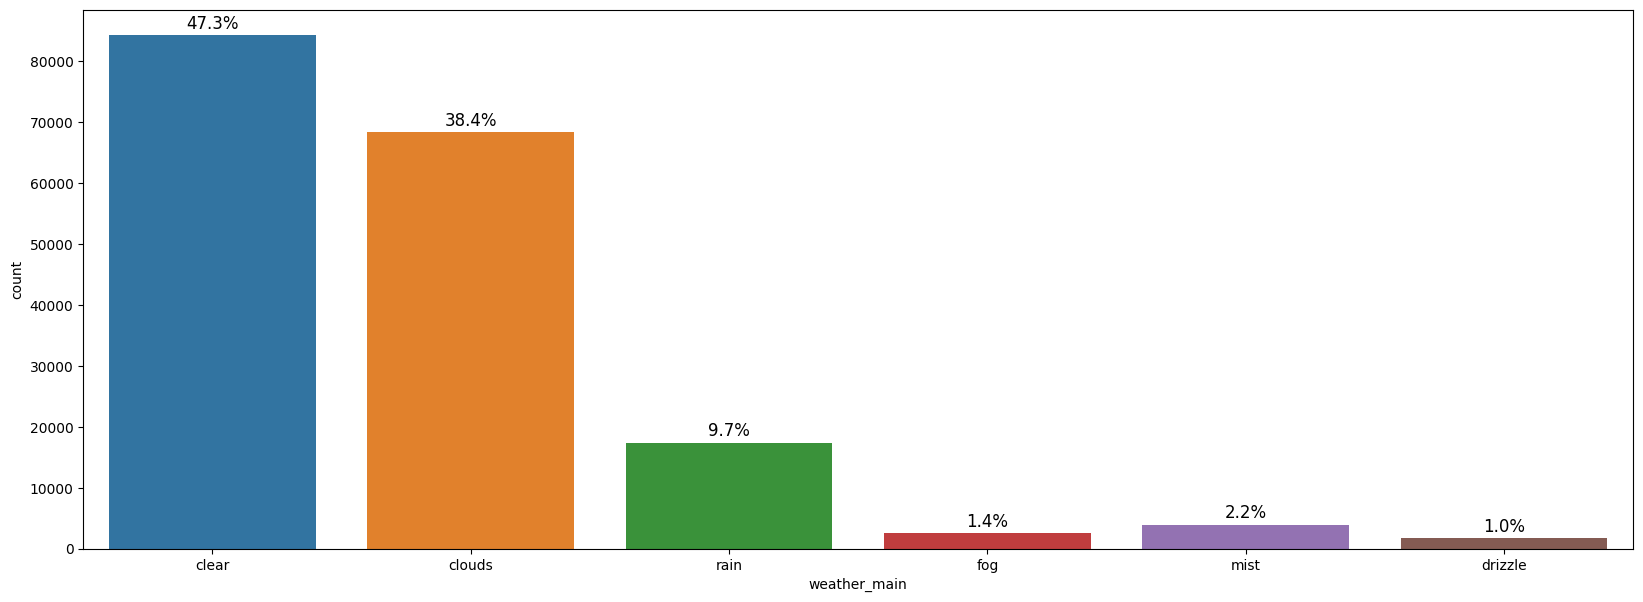

In [112]:
total = len(df)
plt.figure(figsize=(20, 7))
ax = sns.countplot(data=df, x='weather_main')

# Add percentage annotations to the bars
for p in ax.patches:
    count = p.get_height()  # Get the count of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')  # Add percentage annotation

# Display the plot
plt.show()

### Dropping 'weather_description', 'weather_icon'

##### Reason
1. weather_main provides a high-level category of the weather (e.g., clouds, clear, rain), which is already a summary of the weather conditions.
2. weather_description provides a more detailed description of the weather_main, but if you do not need this level of granularity, it can be redundant.
3. weather_icon represents the same information in a visual/icon format, which is useful for UI but likely not necessary for modeling or analysis.


### Dropping 'season', 'day_name', 'price bins'

##### Reason 
1. These columns are only for visualization. 

In [113]:
df.drop(columns=['weather_description', 'weather_icon', 'season', 'day_name', 'price bins'] , inplace=True, axis=1)

In [114]:
df.to_csv("final_df.csv")